# Exploring the Data
Exploration of Quarterly Reports and their likelihood to influence future price movement in the following report.

## Importing Necessary libraries

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 70)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle

### Loading the Data

In [3]:
with open("main_df.pkl",'rb') as fp:
    final_df = pickle.load(fp)

## Visualizing the count of Buy, Hold, and Sells
Visual check for any class imbalance among the quarterly reports.

In [4]:
# Separating each class into respective DataFrames
buy_df = final_df[final_df['Decision']==1].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)
hold_df = final_df[final_df['Decision']==2].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)
sell_df = final_df[final_df['Decision']==0].loc[:, final_df.columns != 'Decision'].reset_index(drop=True)

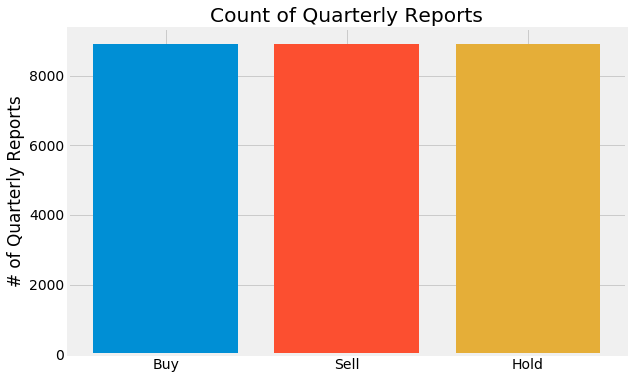

In [5]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

# Plotting the count of each DataFrame of each class
plt.bar("Buy", buy_df.shape[0])
plt.bar("Sell", sell_df.shape[0])
plt.bar("Hold", hold_df.shape[0])

plt.ylabel("# of Quarterly Reports")
plt.title('Count of Quarterly Reports')
plt.show()

### Plotting the Returns each Quarterly Report will have based on class

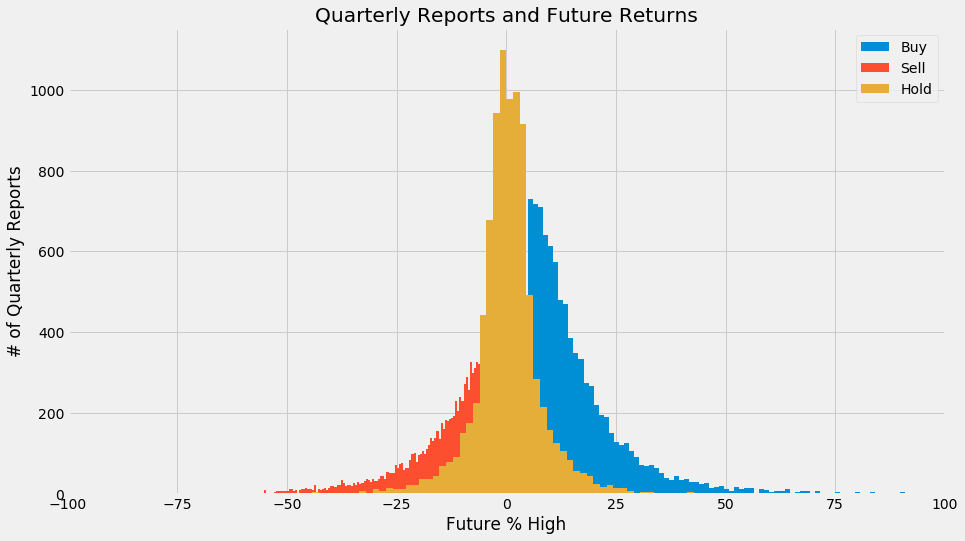

In [17]:
plt.figure(figsize=(14,8))
plt.style.use('fivethirtyeight')

# Plotting the distribution of each DF's Future % return
buy_df[buy_df['Future % High']<=1000]['Future % High'].hist(bins=800, label='Buy')
sell_df['Future % High'].hist(bins=200, label='Sell')
hold_df['Future % High'].hist(bins=200, label='Hold')


plt.title("Quarterly Reports and Future Returns")
plt.ylabel("# of Quarterly Reports")
plt.xlabel("Future % High")
plt.xlim([-100, 100])
plt.legend()
plt.show()

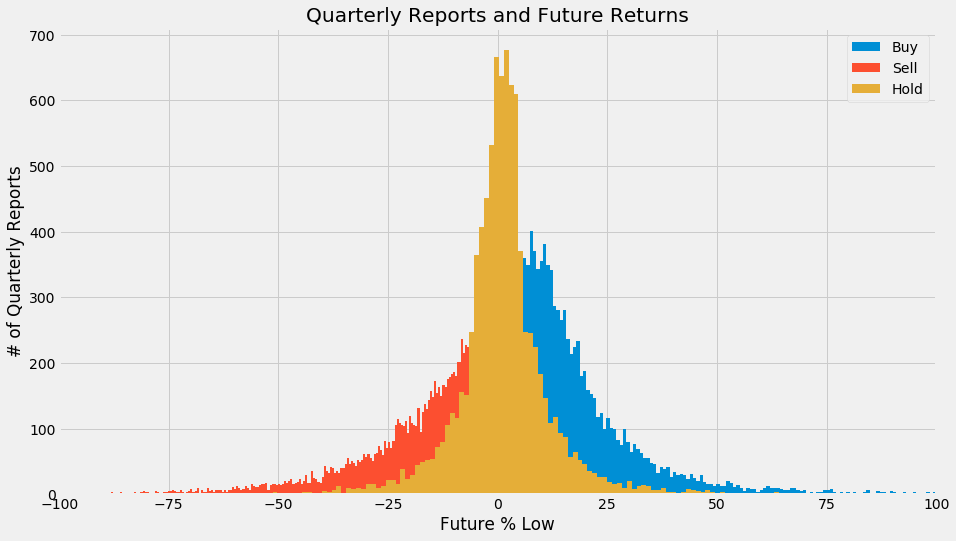

In [18]:
plt.figure(figsize=(14,8))
plt.style.use('fivethirtyeight')

# Plotting the distribution of each DF's Future % return
buy_df[buy_df['Future % Low']<=1000]['Future % Low'].hist(bins=800, label='Buy')
sell_df['Future % Low'].hist(bins=200, label='Sell')
hold_df['Future % Low'].hist(bins=200, label='Hold')


plt.title("Quarterly Reports and Future Returns")
plt.ylabel("# of Quarterly Reports")
plt.xlabel("Future % Low")
plt.xlim([-100, 100])
plt.legend()
plt.show()

## Correlations
Checking for any correlation between the future quarterly report's price and the current quarter's features.

#### Function for Visualizing and Correlation Matrix

In [19]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

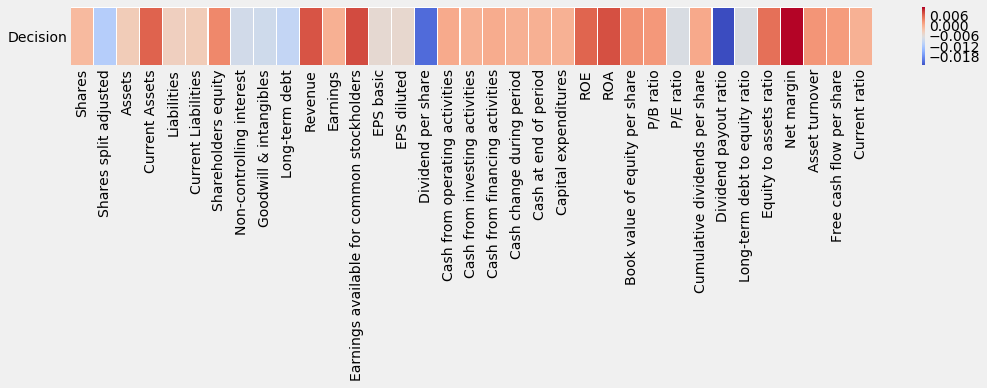

In [21]:
# Correlation DF of all classes
corr = final_df.corr().iloc[[-2],:-2].drop(['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low'], 1)

# Plotting the Correlation DF as a heatmap
plt.figure(figsize=(16,1))
sns.heatmap(corr, annot=False, linewidths=.1, cmap="coolwarm")
plt.xticks()
plt.yticks(rotation=0)
plt.show()

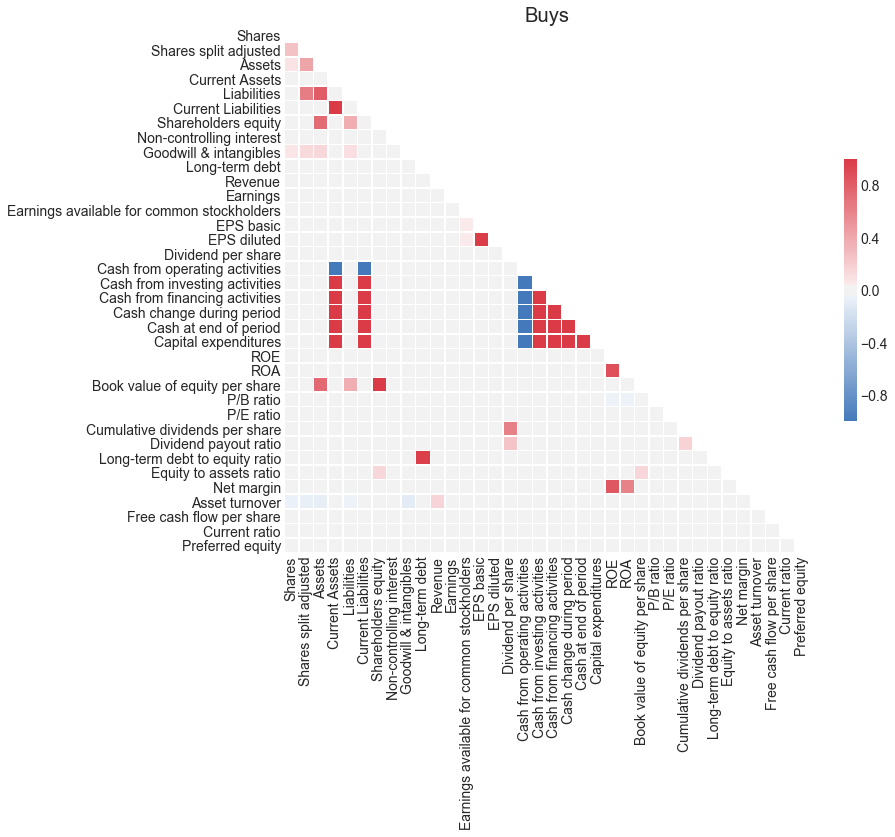

In [22]:
# Correlation for Buy DF
corr = buy_df.drop(['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low'], 1).corr()

CorrMtx(corr)
plt.title("Buys");

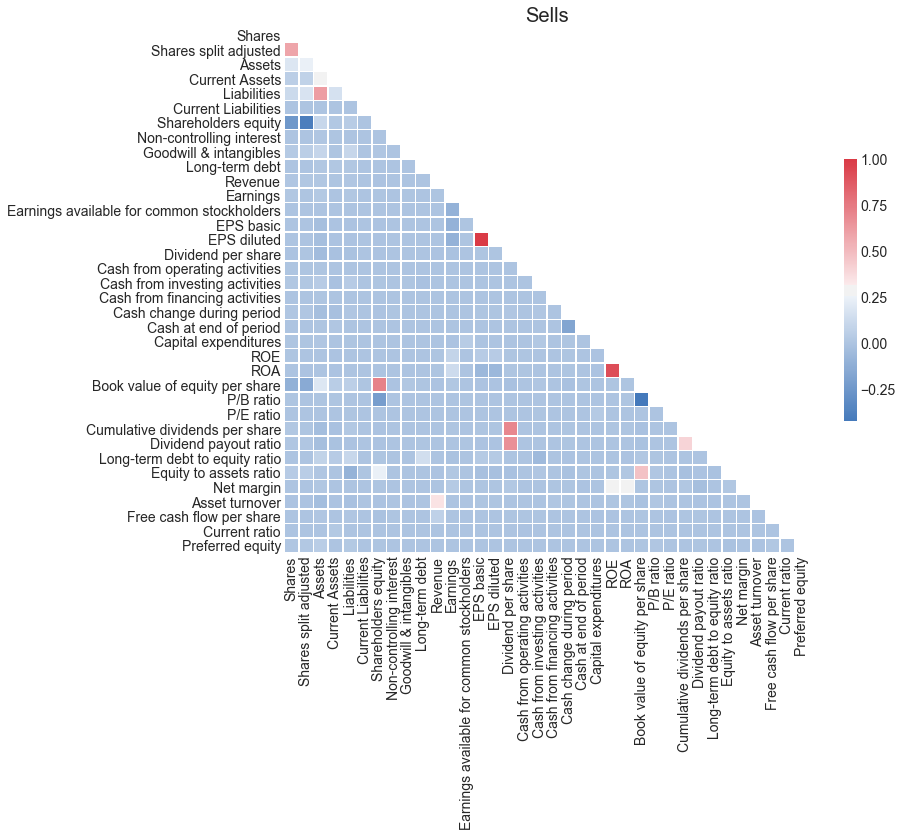

In [23]:
# Correlation for Sell DF
corr = sell_df.drop(['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low'], 1).corr()

# Plotting
CorrMtx(corr)
plt.title("Sells");

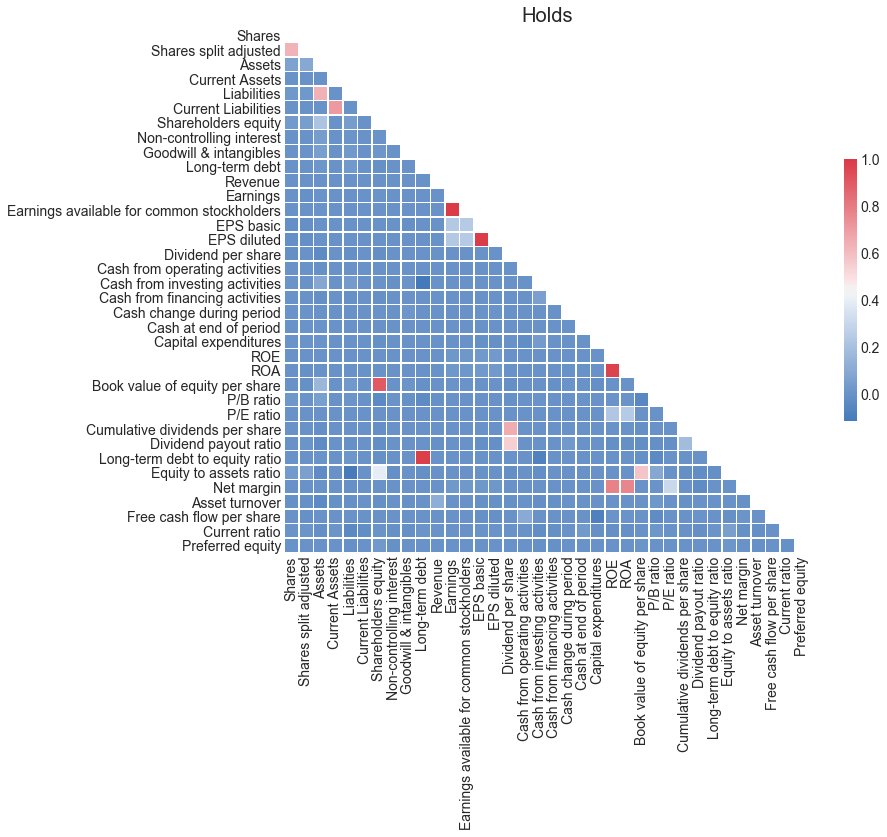

In [24]:
# Correlation for Hold DF
corr = hold_df.drop(['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low'], 1).corr()

# Plotting
CorrMtx(corr)
plt.title("Holds");

## Exploration of each class

### Transforming/Scaling the Data
Scaling using Min Max to preserve the shape of the original distribution.

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [26]:
# Scaling each of the class DataFrames
buy_df  = pd.DataFrame(scaler.fit_transform(buy_df), index=buy_df.index, columns=buy_df.columns)
hold_df = pd.DataFrame(scaler.fit_transform(hold_df), index=hold_df.index, columns=hold_df.columns)
sell_df = pd.DataFrame(scaler.fit_transform(sell_df), index=sell_df.index, columns=sell_df.columns)

### Plotting each Class
Determining which features have the most impact on buy, sell, hold. No bearing on stock.

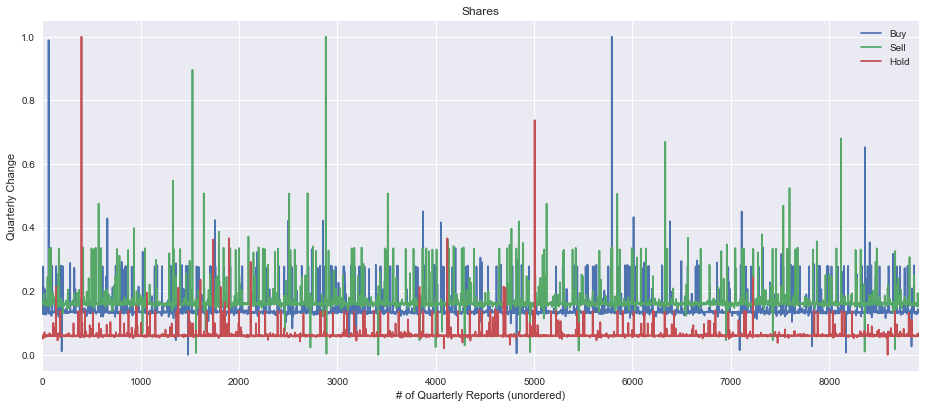

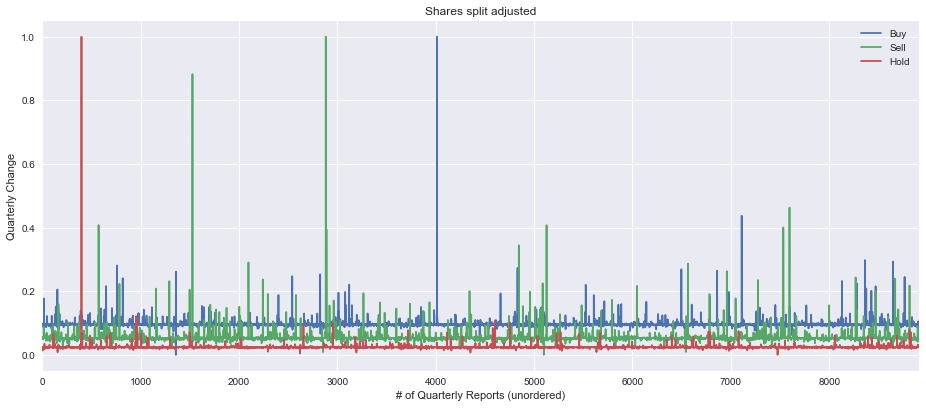

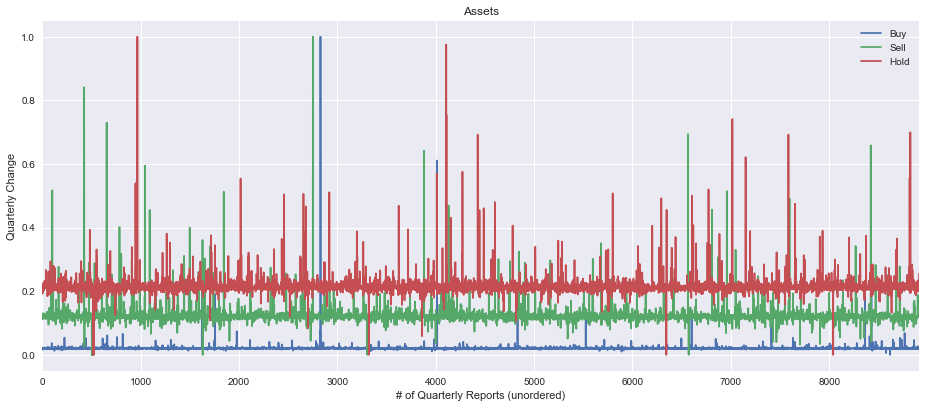

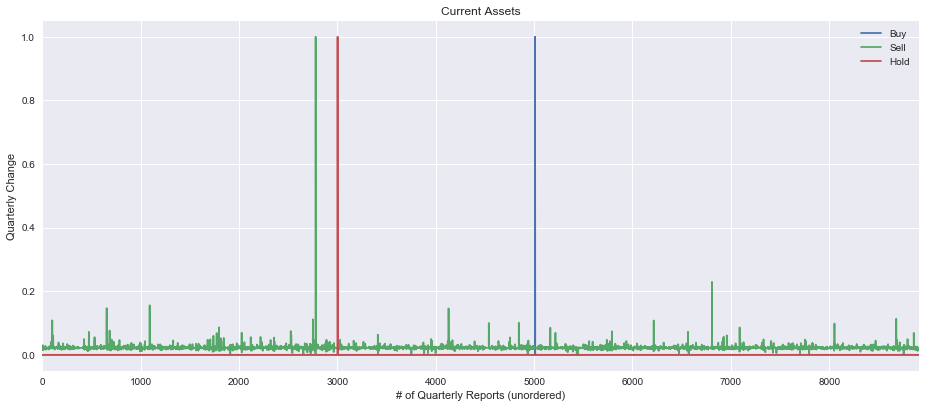

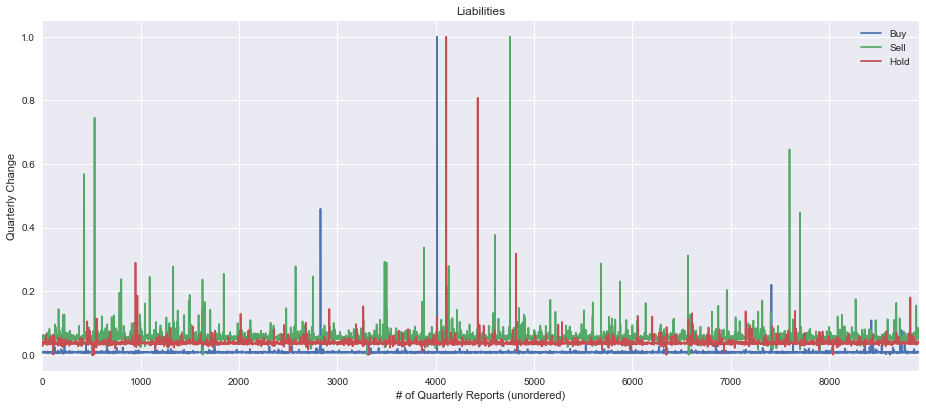

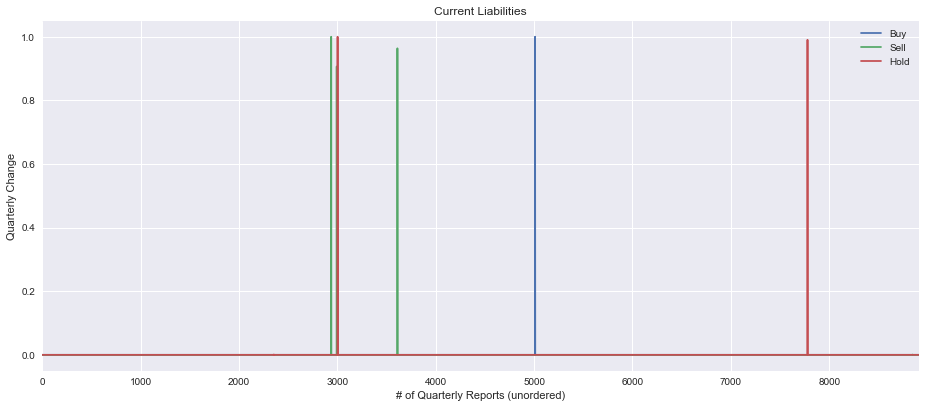

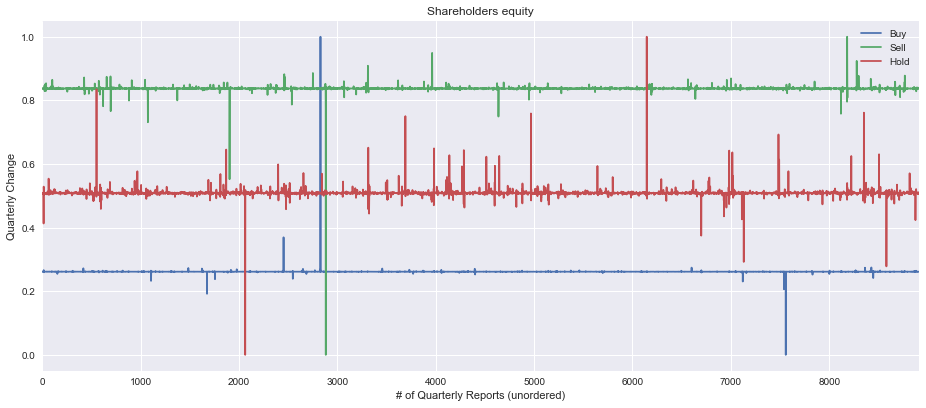

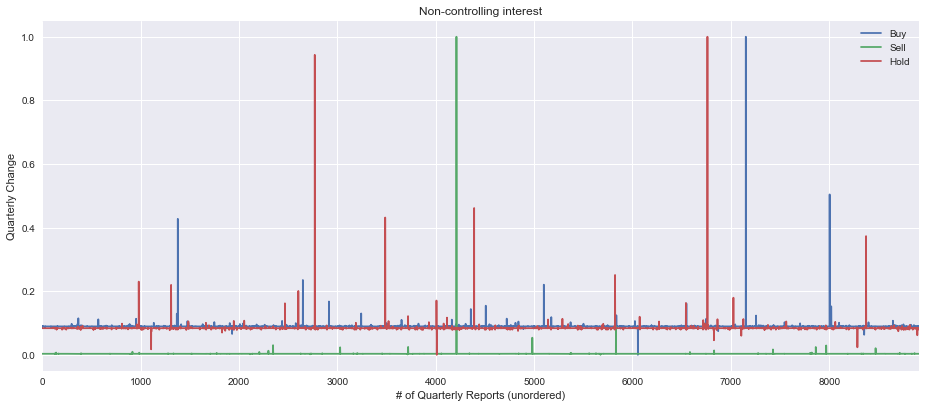

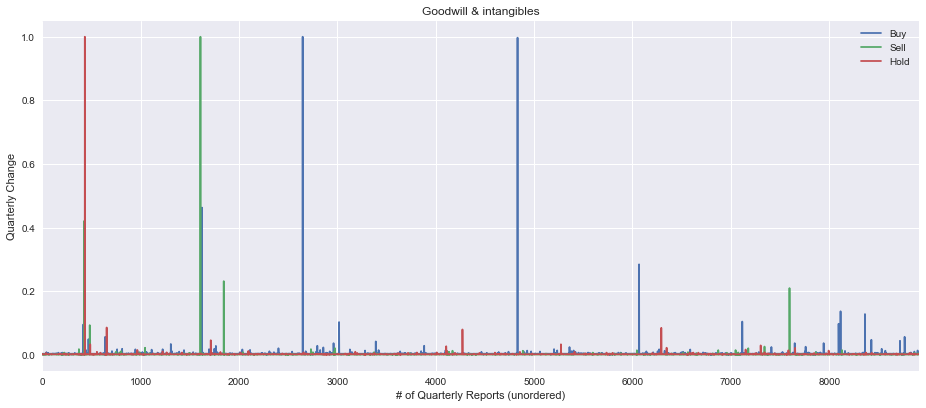

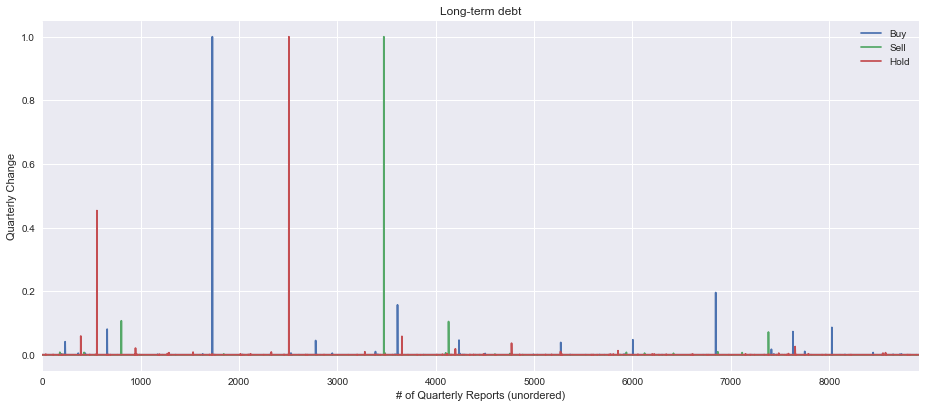

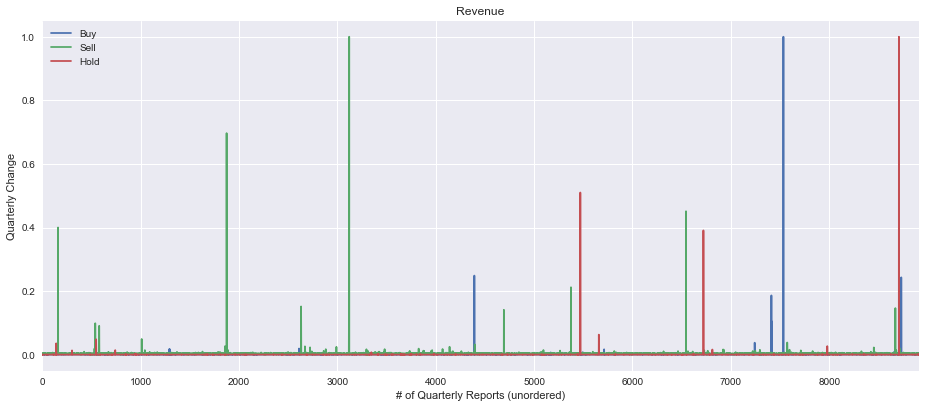

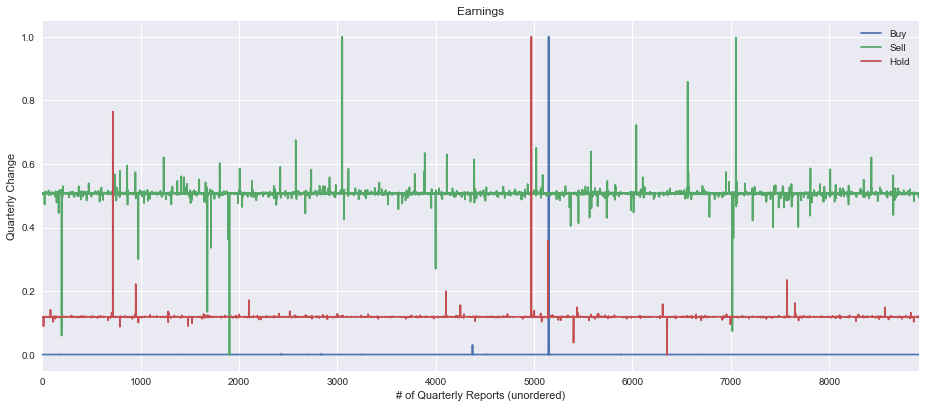

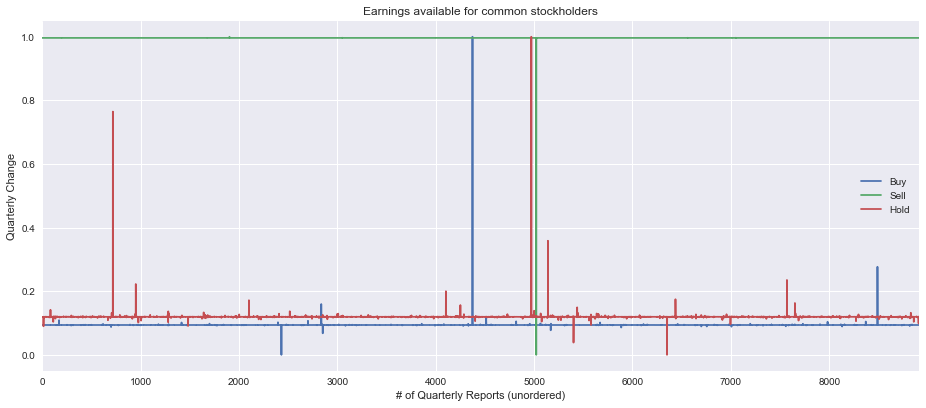

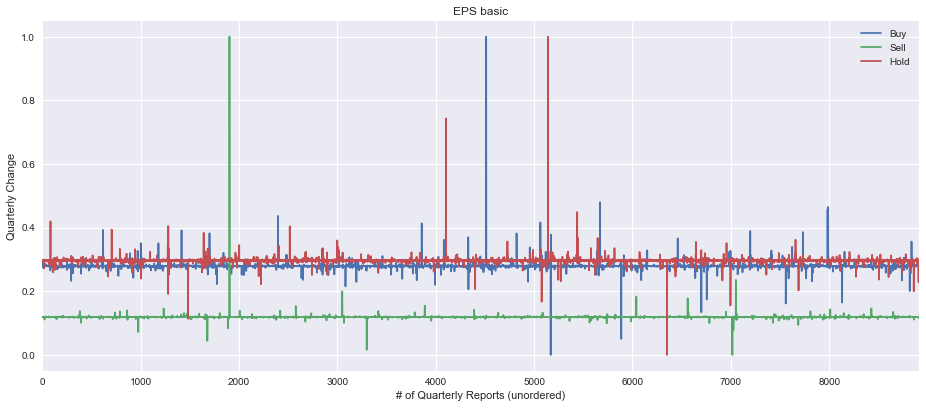

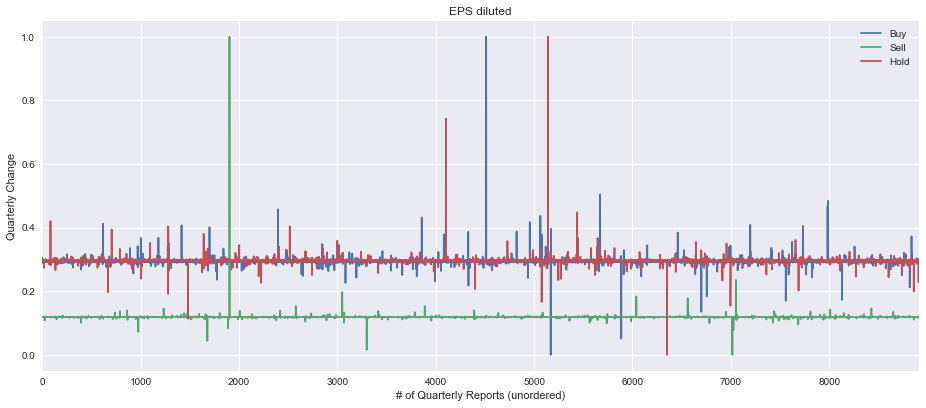

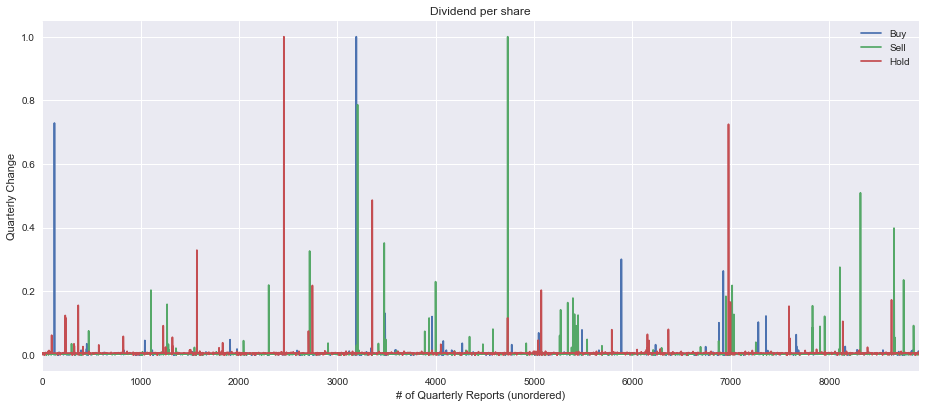

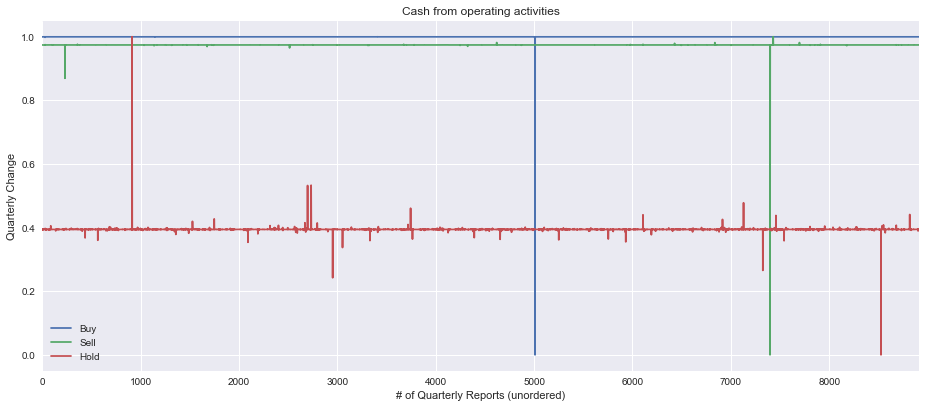

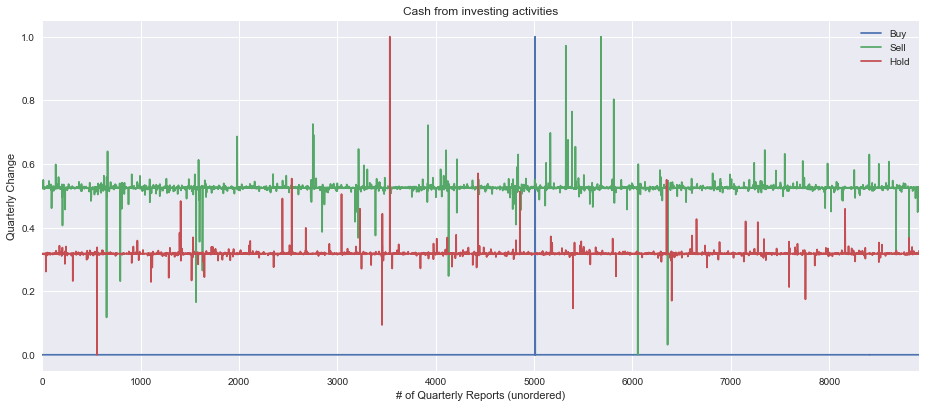

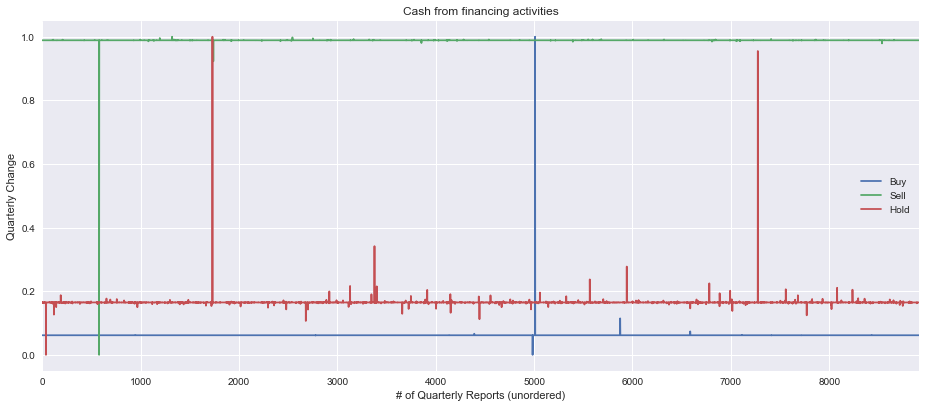

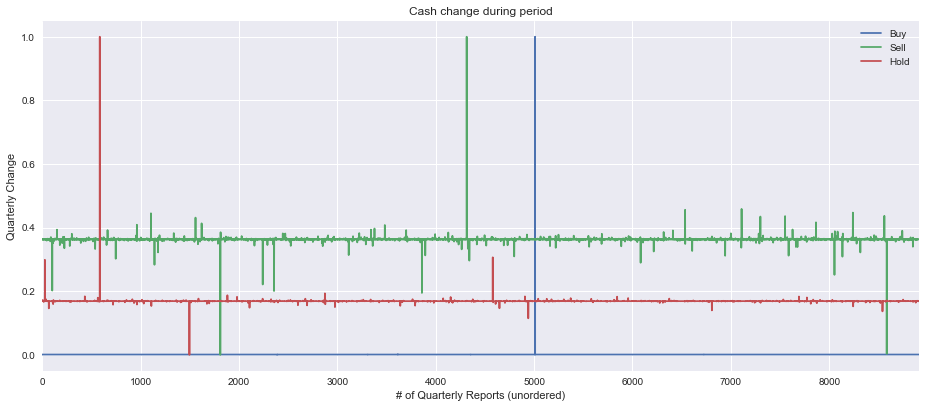

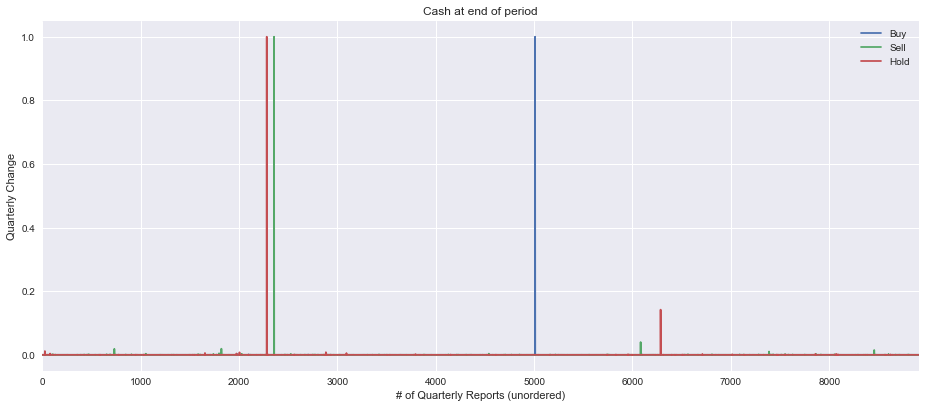

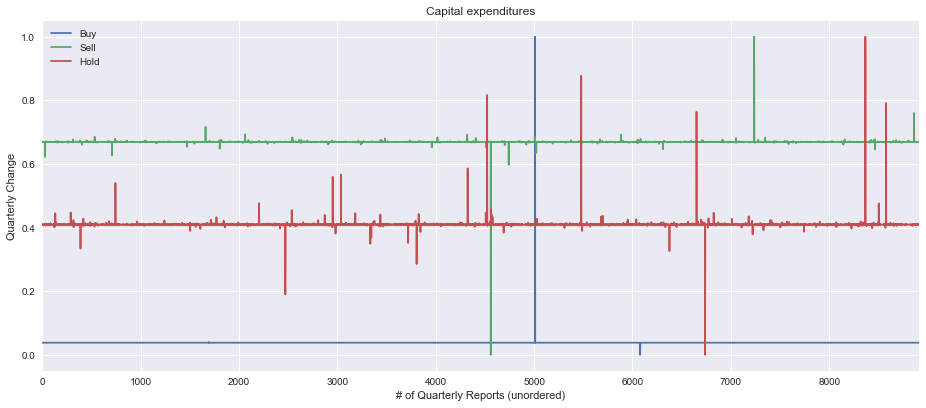

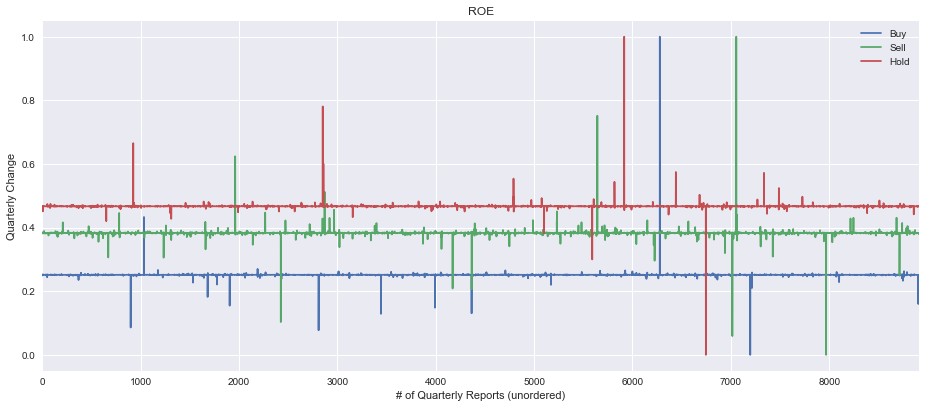

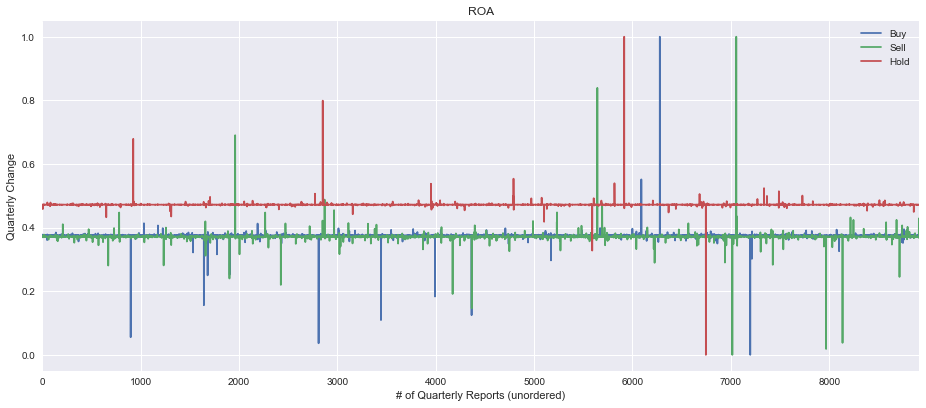

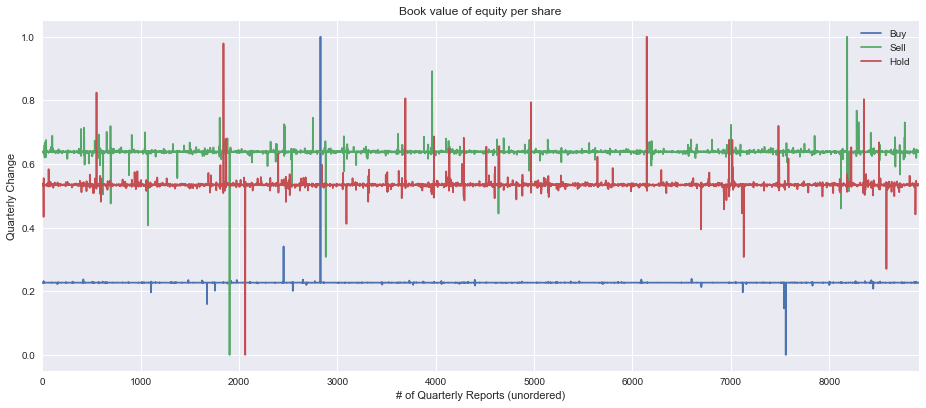

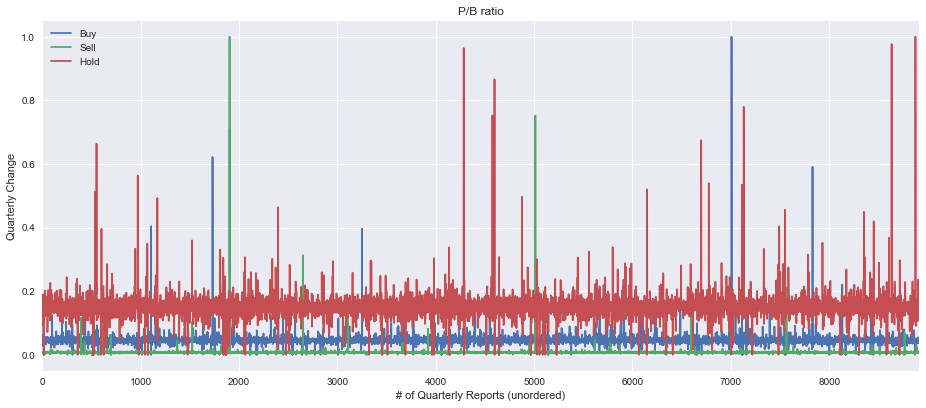

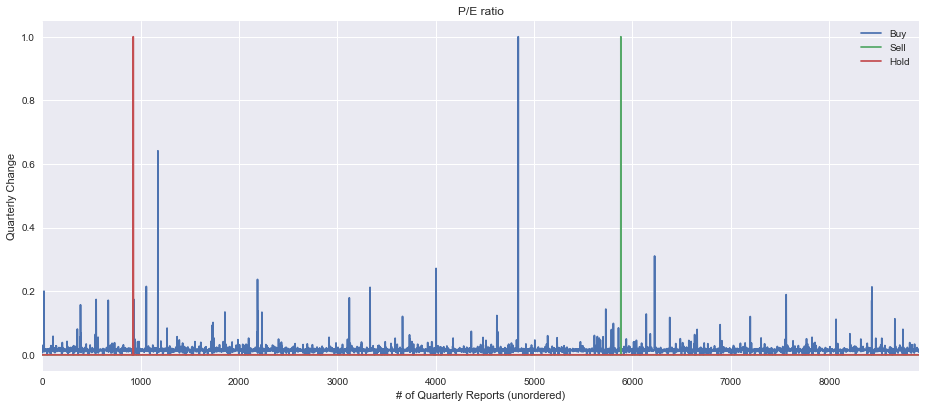

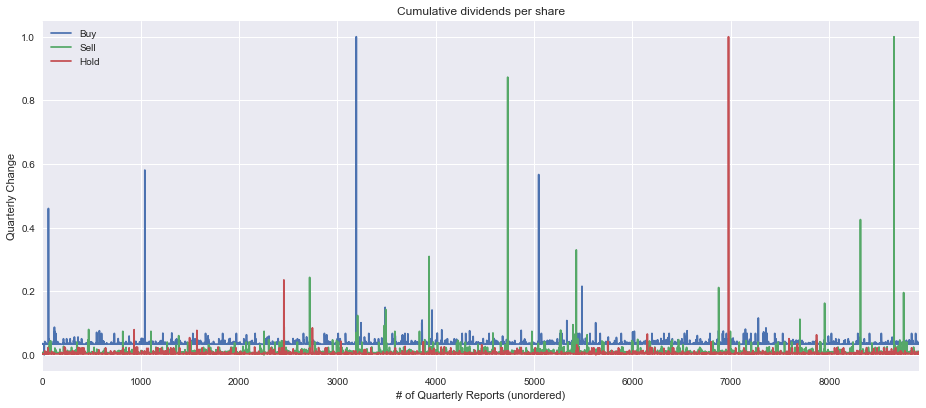

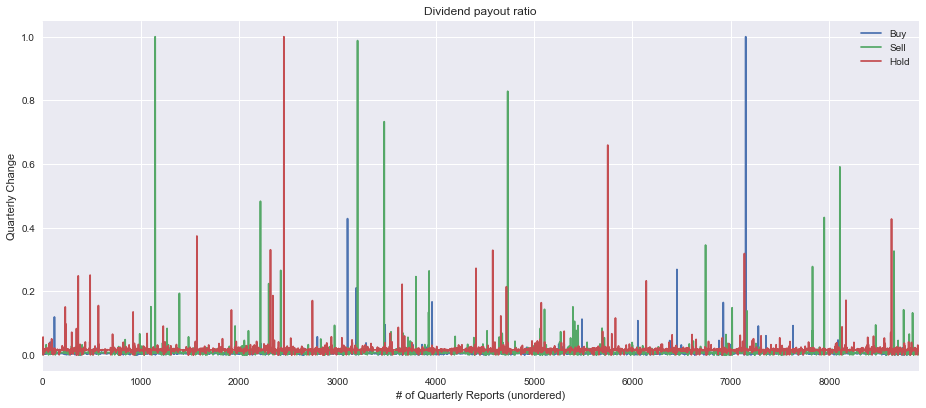

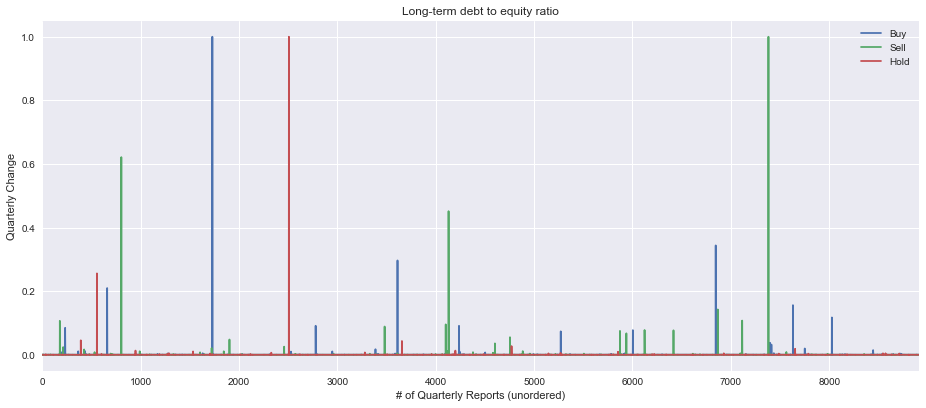

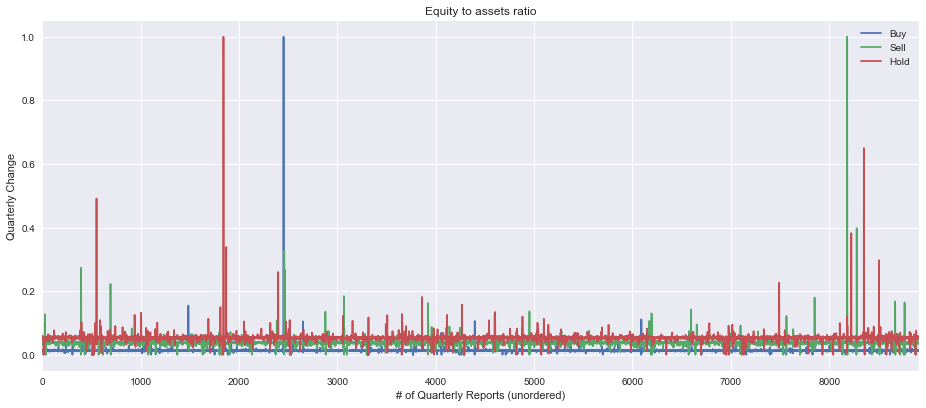

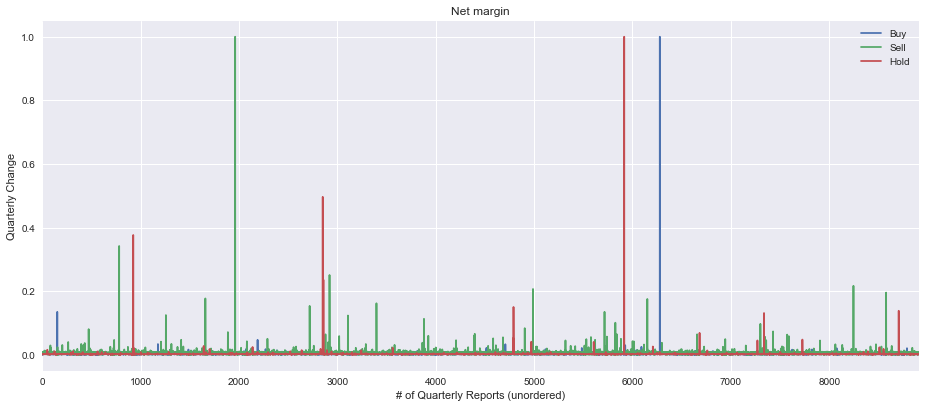

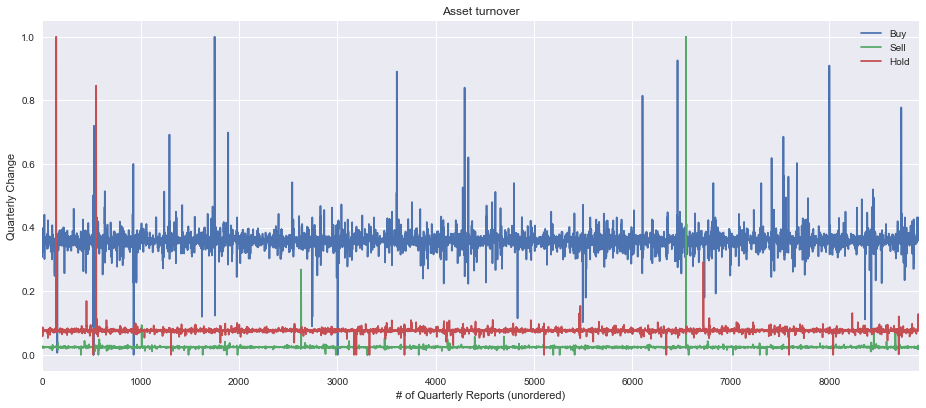

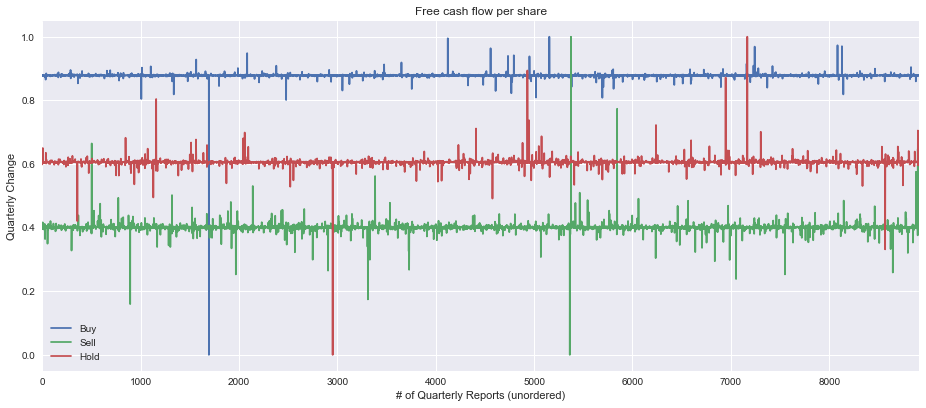

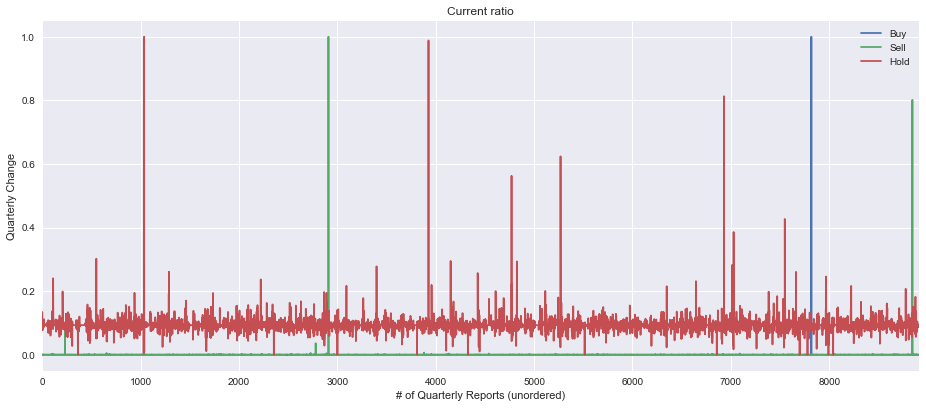

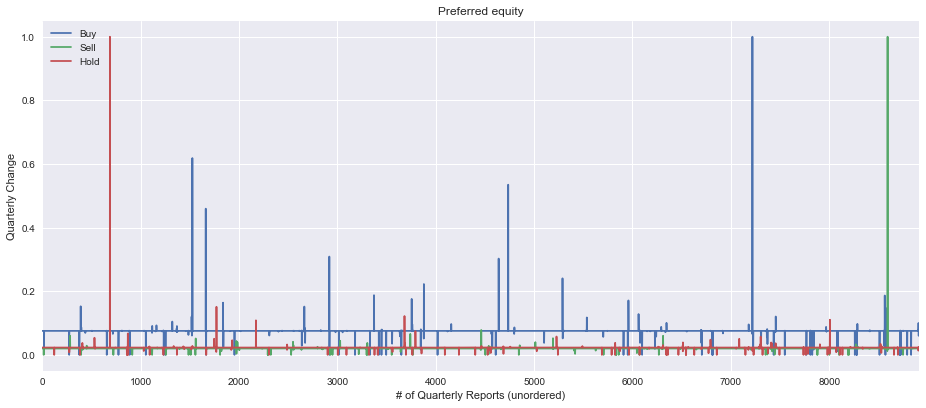

In [28]:
plt.style.use('seaborn')

# Plotting the features for each class
for i in buy_df.columns:
    if i not in ['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low']:
        plt.figure(figsize=(14,6))

        buy_df[i].plot(label='Buy')
        sell_df[i].plot(label='Sell')
        hold_df[i].plot(label='Hold')

        plt.ylabel("Quarterly Change")
        plt.xlabel("# of Quarterly Reports (unordered)")
        plt.legend()
        plt.title(f"{i}")
        plt.show()

Counting the significant quarterly reports in each feature and determining which reports are the most prevalent in each feature.

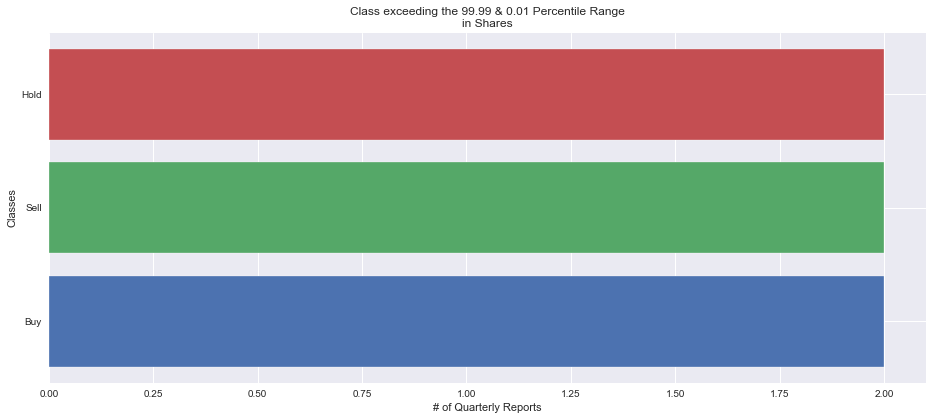

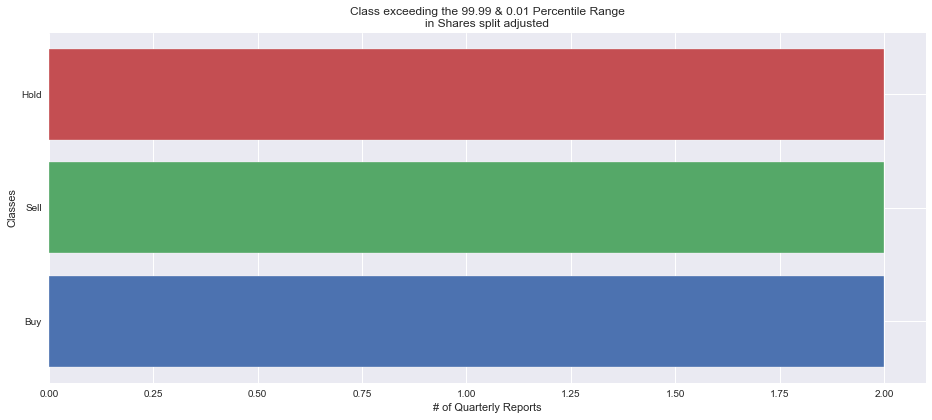

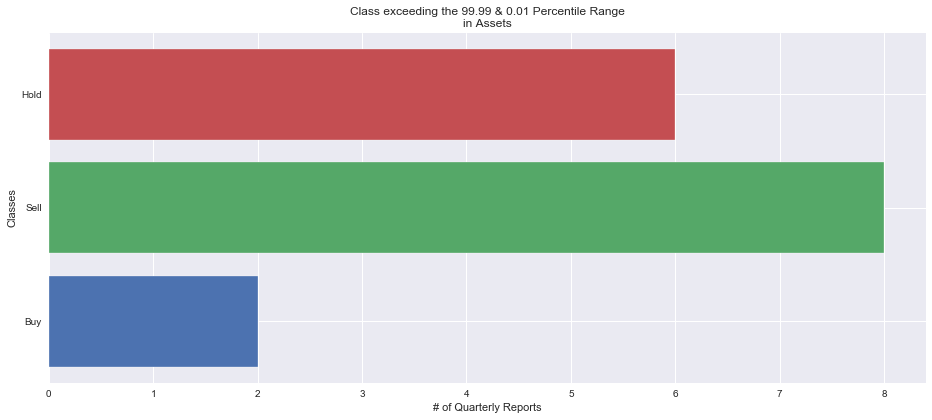

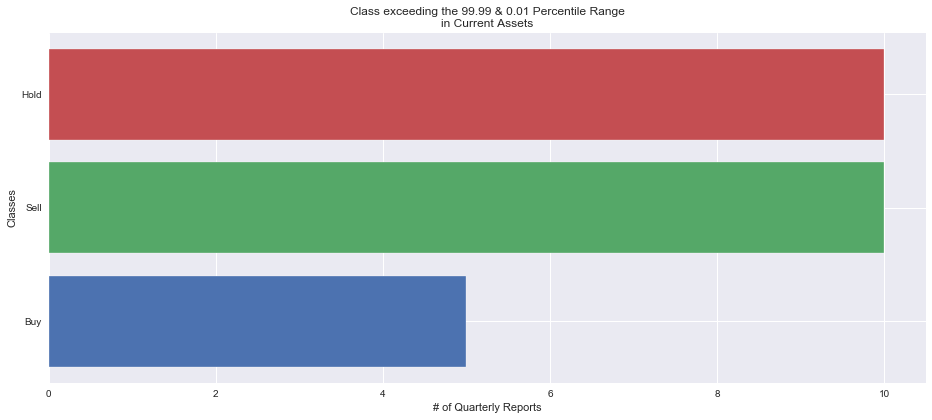

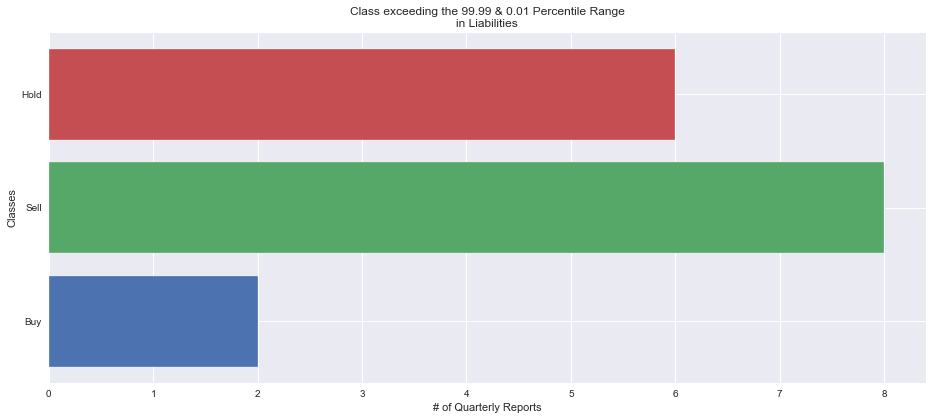

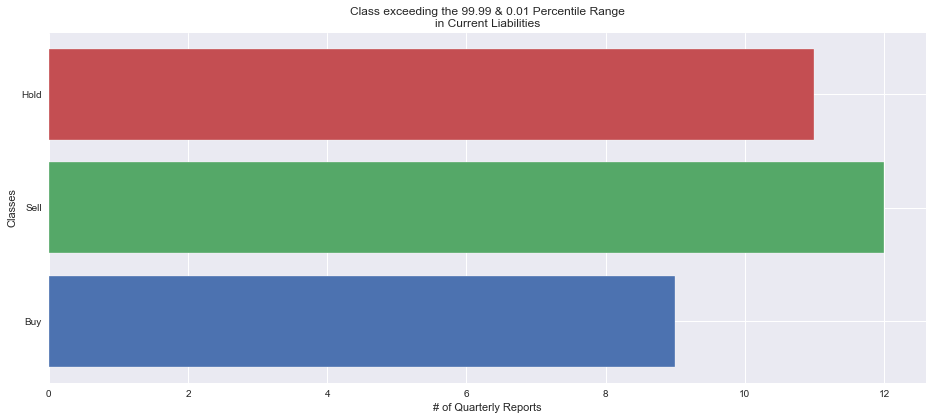

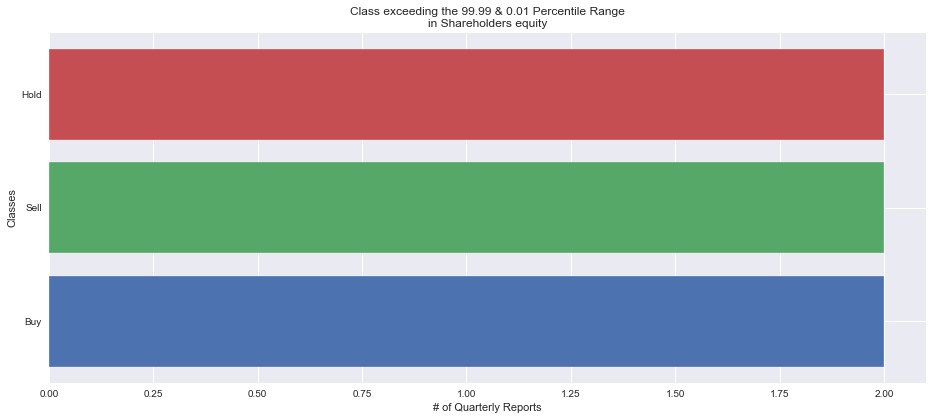

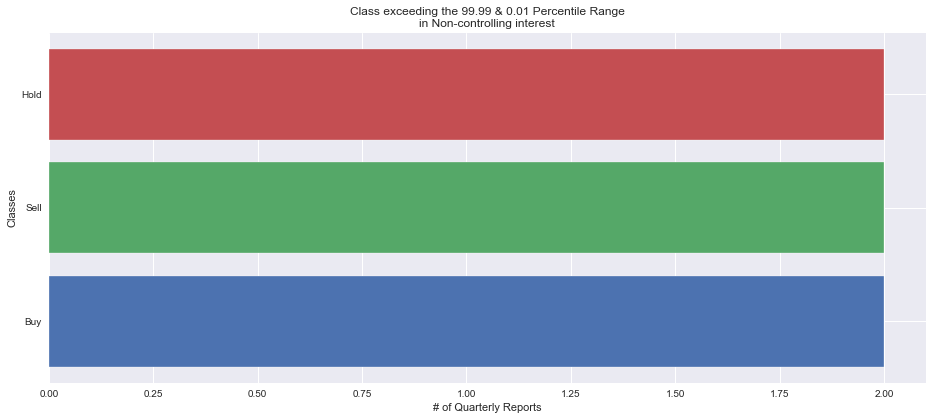

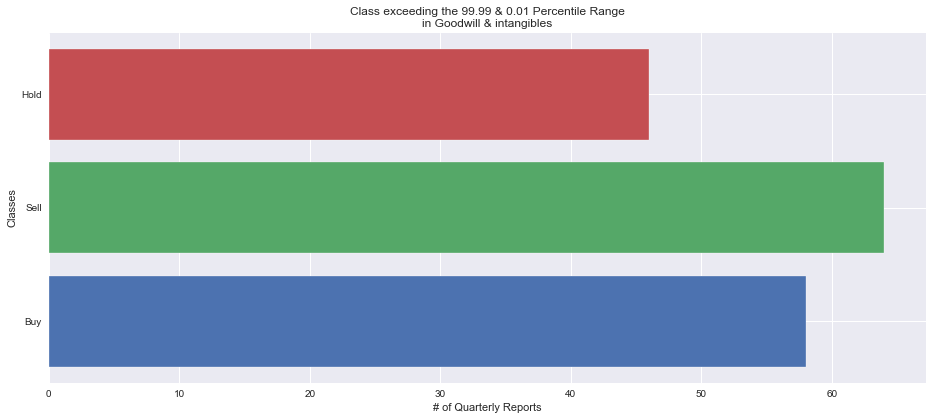

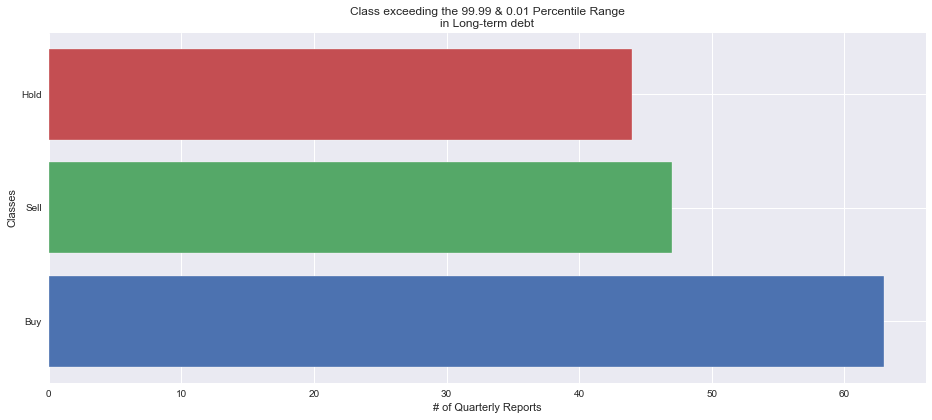

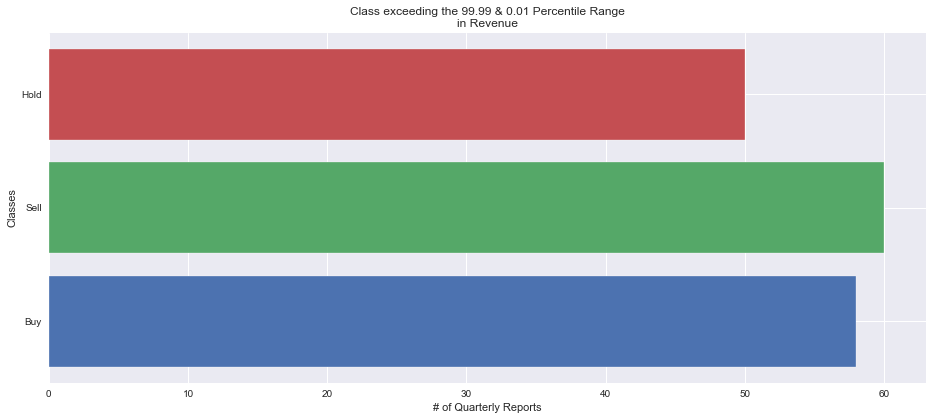

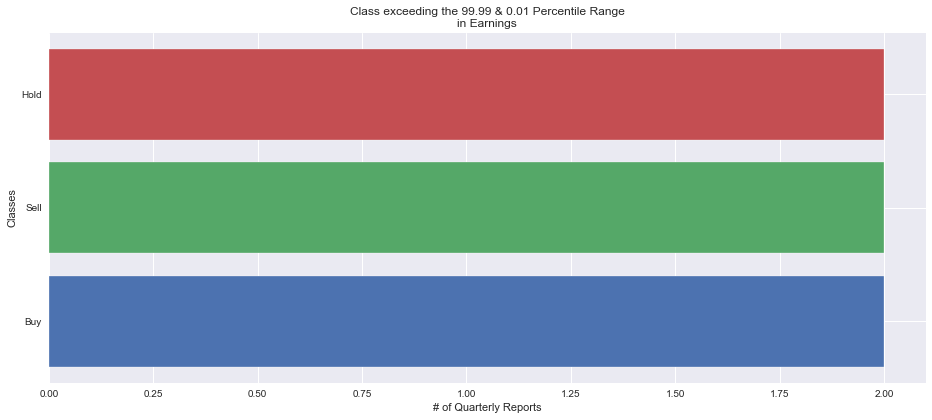

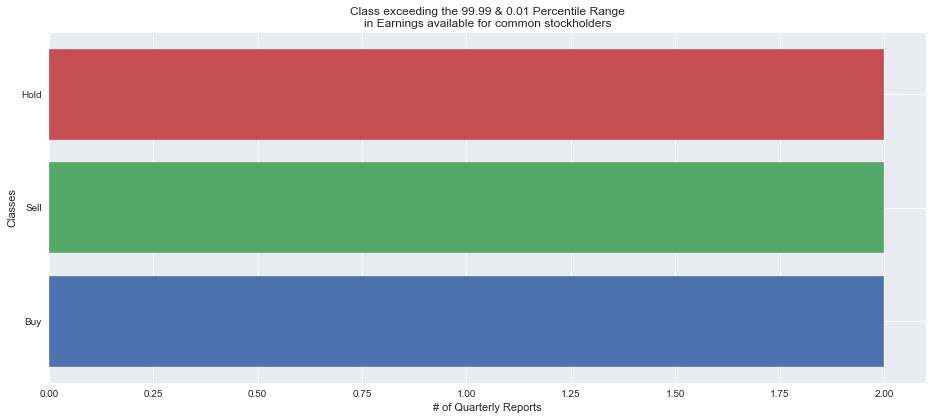

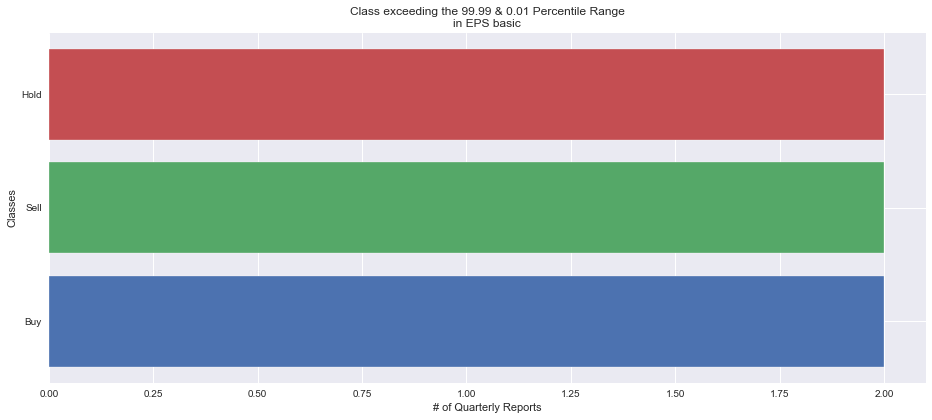

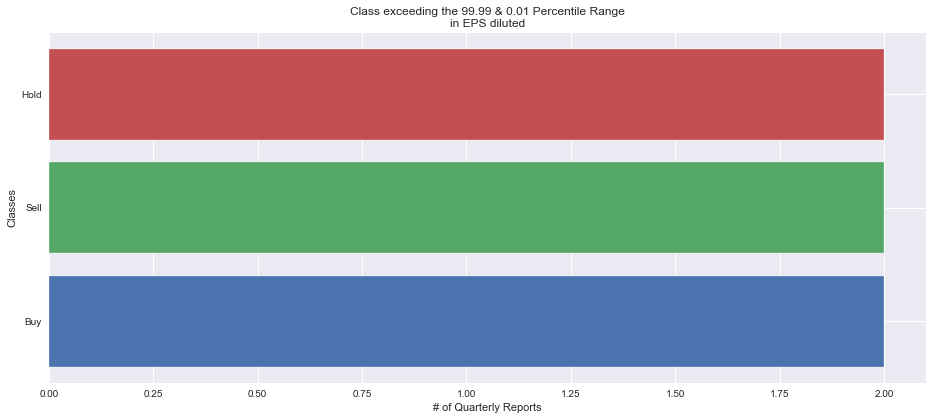

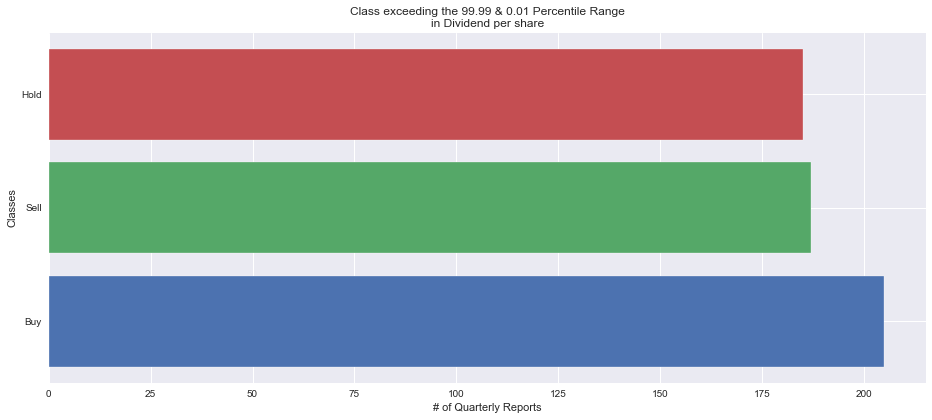

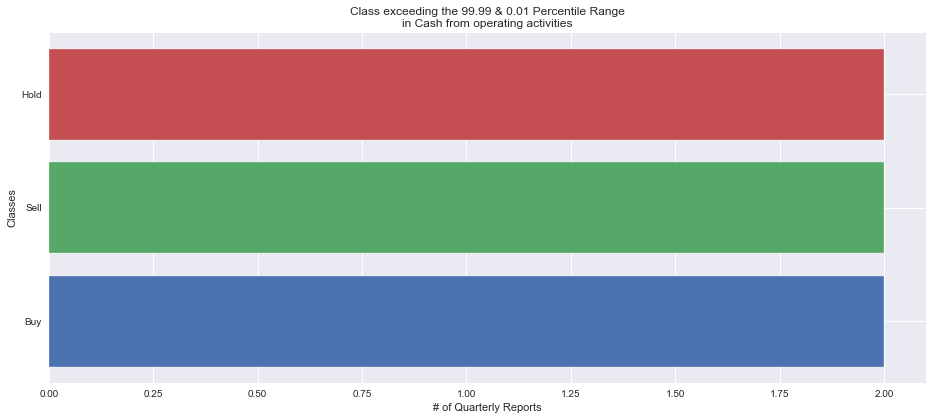

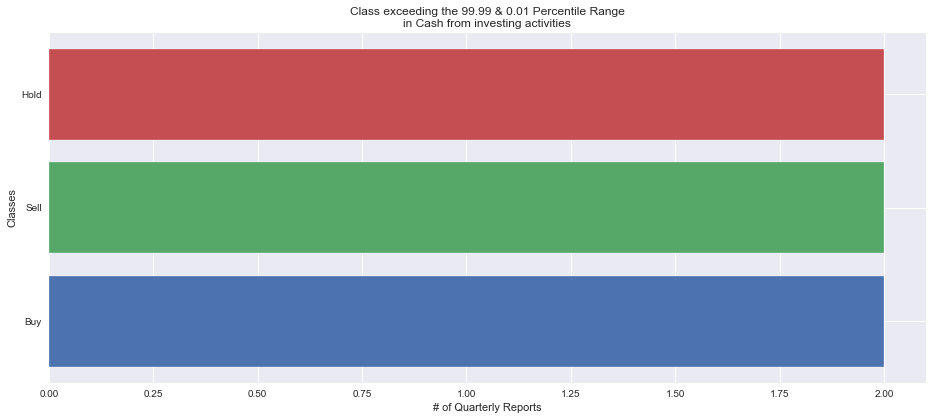

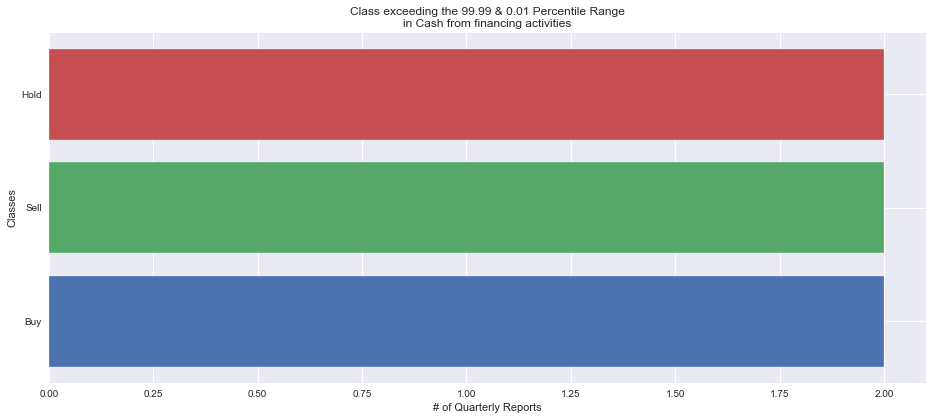

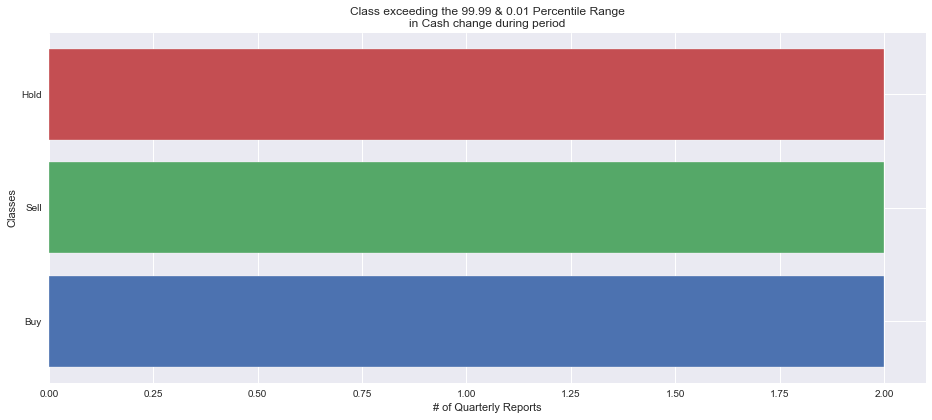

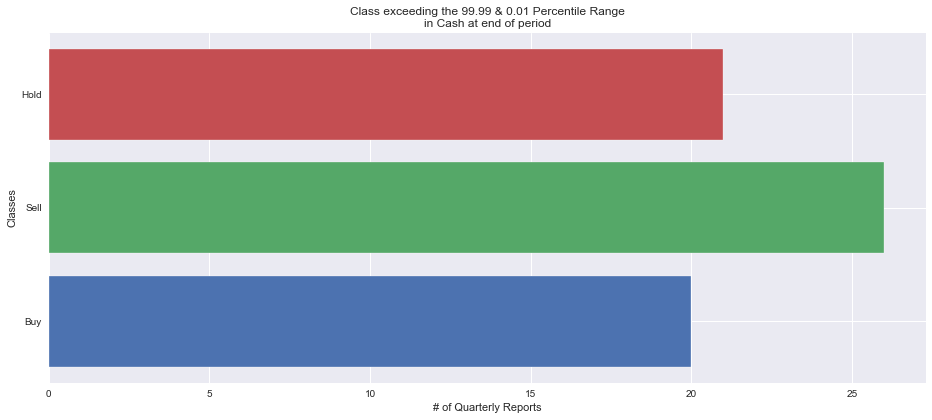

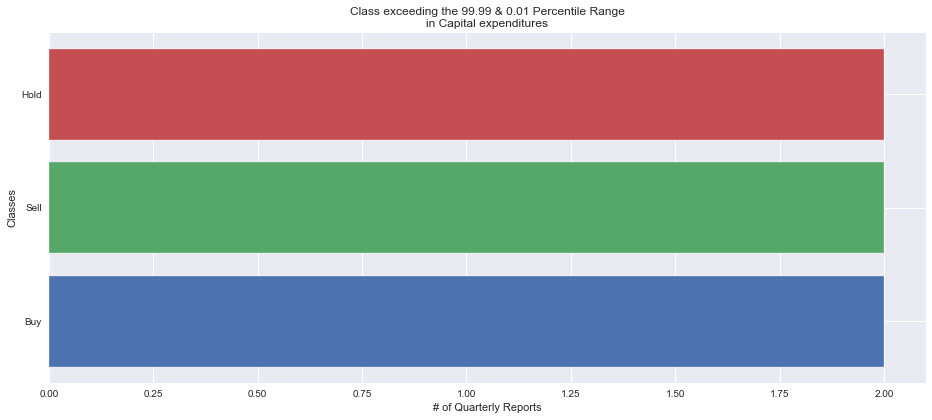

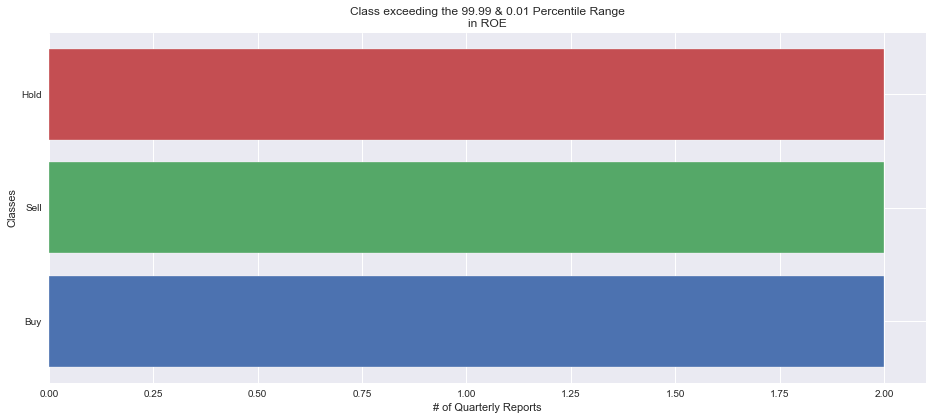

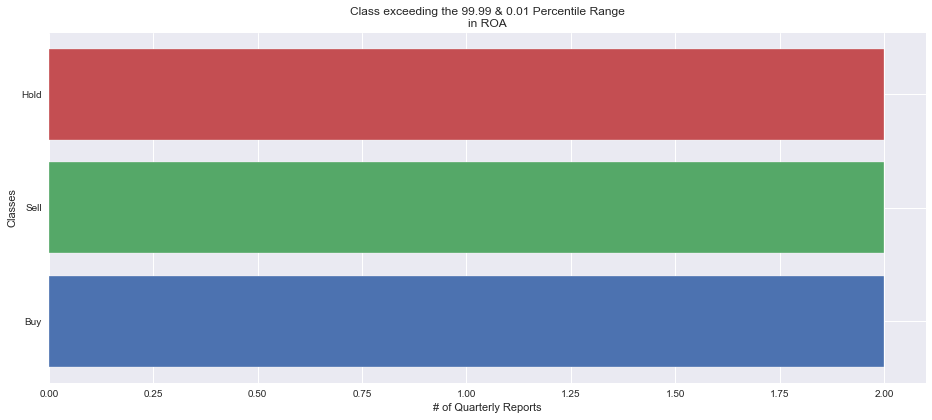

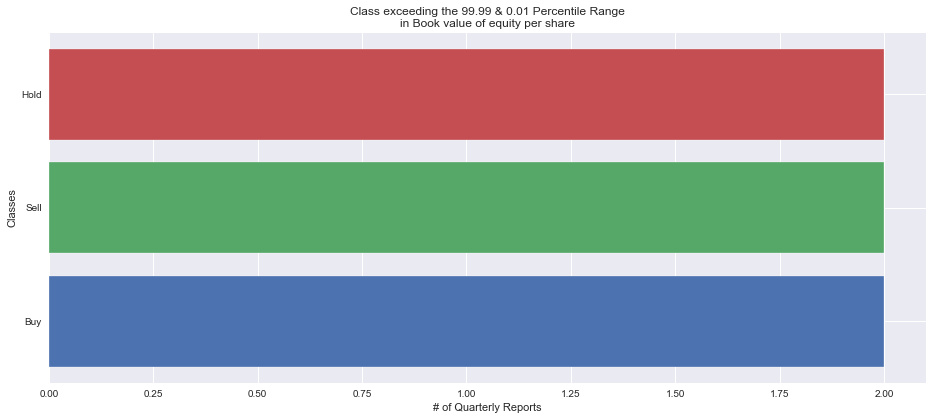

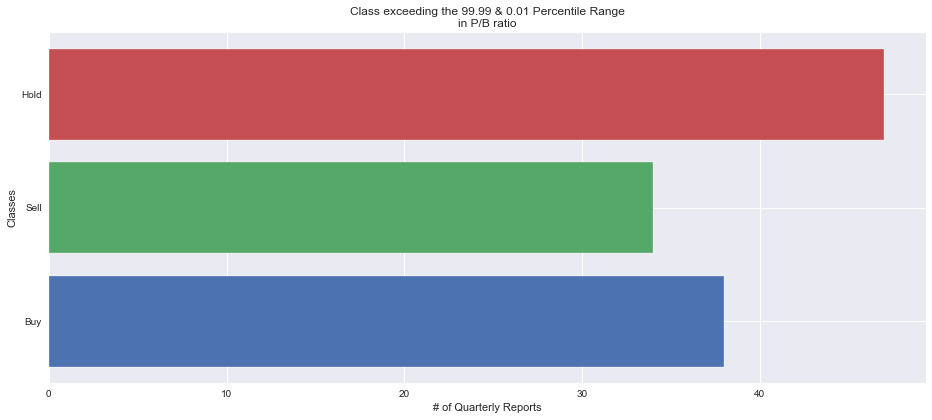

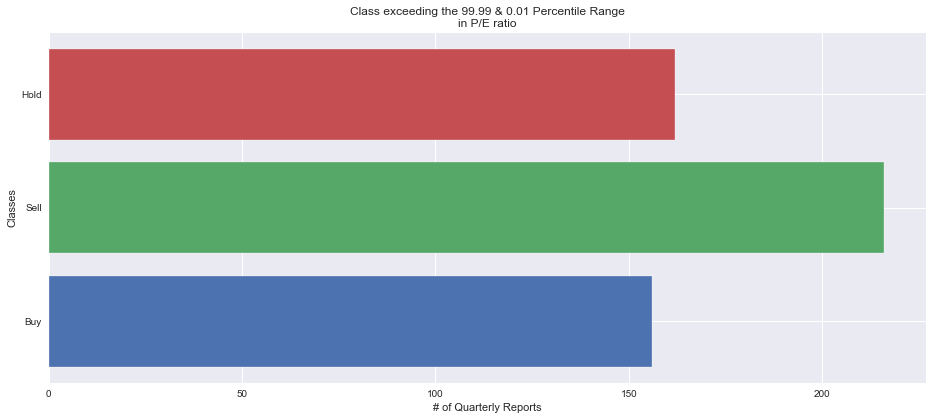

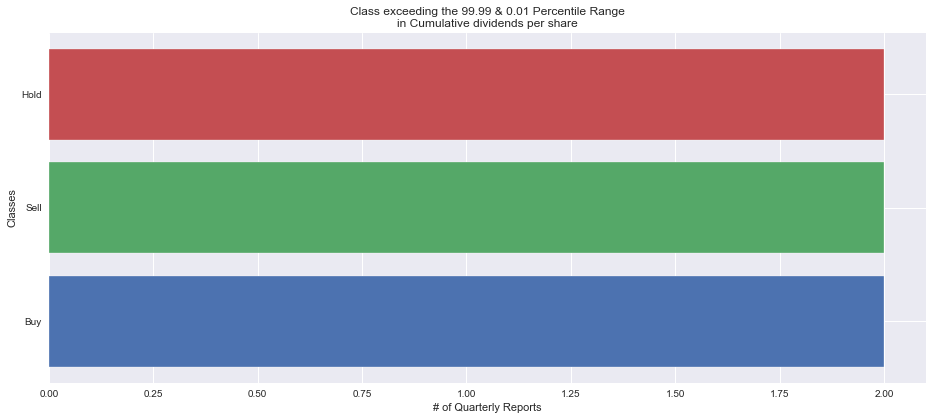

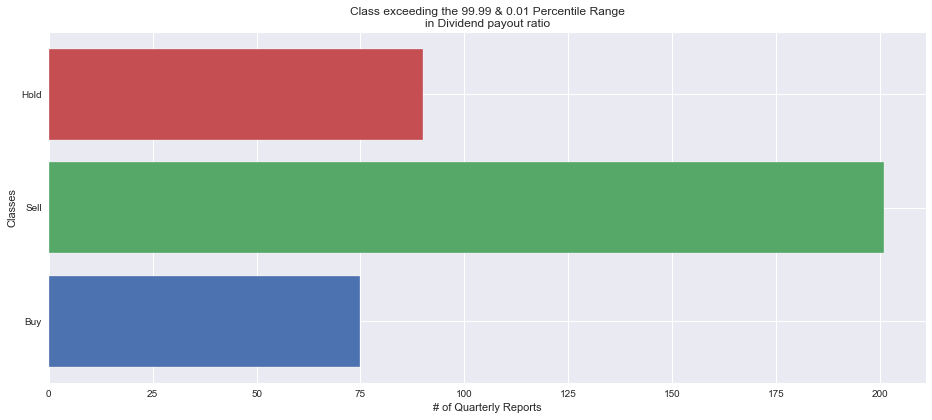

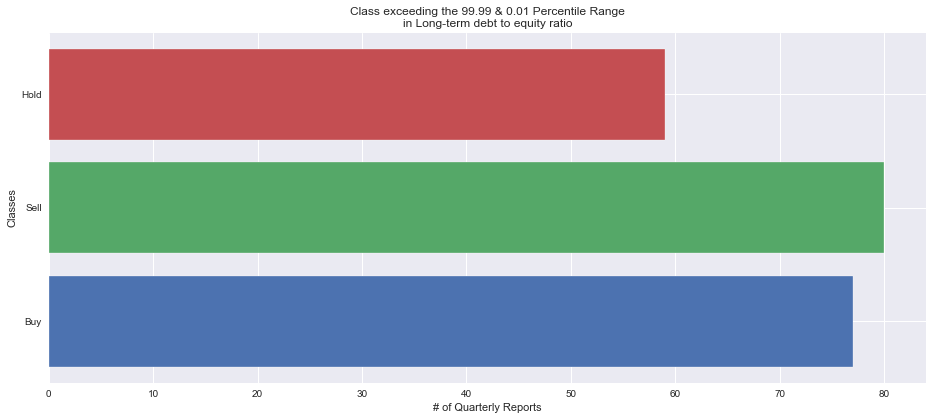

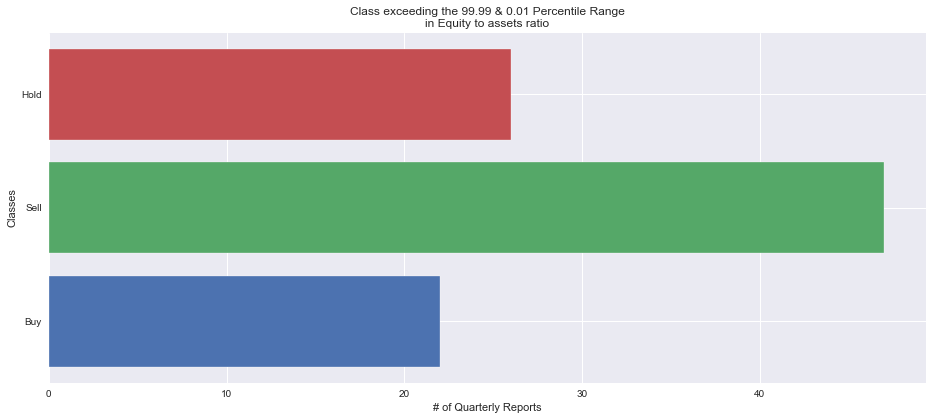

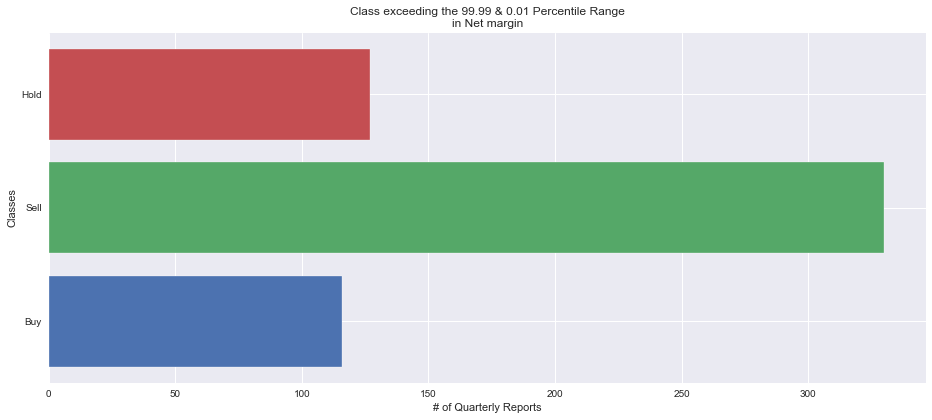

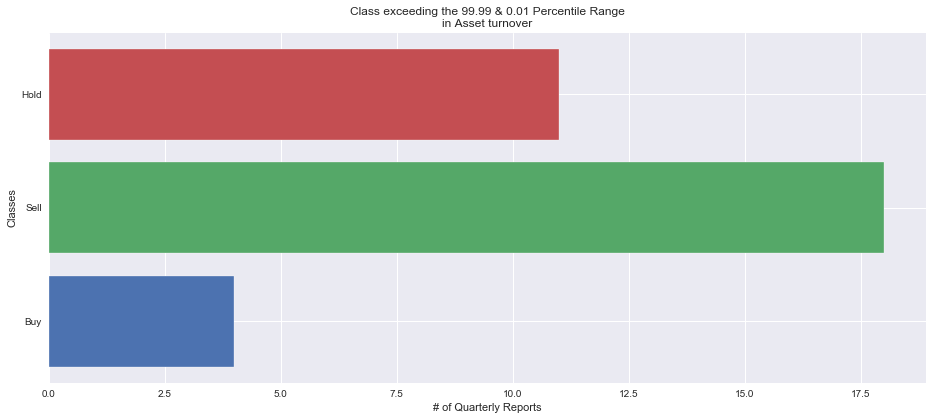

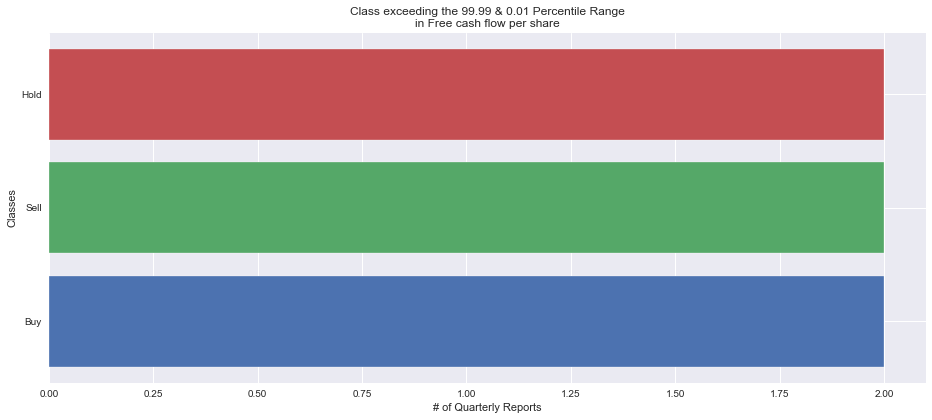

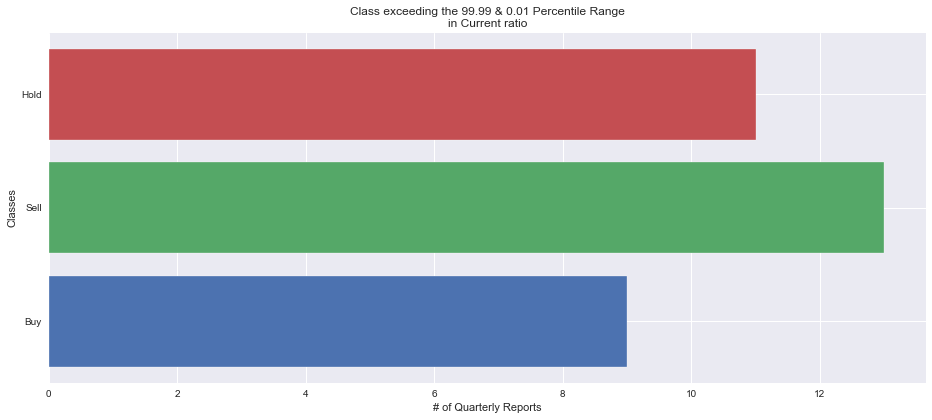

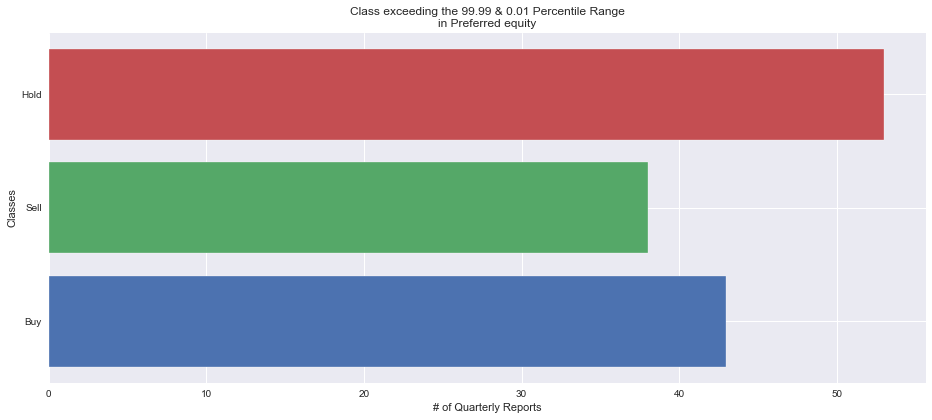

In [29]:
plt.style.use('seaborn')

# Plotting the features for each class
for i in buy_df.columns:
    if i not in ['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low']:
        plt.figure(figsize=(14,6))

        # Threshold to pass to see how prevalent each class is in each feature
        thres1 = 0.9999
        thres2 = 0.0001

        # Plotting the classes
        plt.barh("Buy", buy_df[(buy_df[i]>=buy_df[i].quantile(thres1)) | (buy_df[i]<=buy_df[i].quantile(thres2))].shape[0])
        plt.barh("Sell", sell_df[(sell_df[i]>=sell_df[i].quantile(thres1)) | (sell_df[i]<=sell_df[i].quantile(thres2))].shape[0])
        plt.barh("Hold", hold_df[(hold_df[i]>=hold_df[i].quantile(thres1)) | (hold_df[i]<=hold_df[i].quantile(thres2))].shape[0])

        plt.ylabel("Classes")
        plt.xlabel("# of Quarterly Reports")
        plt.title(f"Class exceeding the {thres1*100} & {thres2*100} Percentile Range\nin {i}")
        plt.show()

## Interacting the Features

In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Scaling the Data

In [31]:
scaler = StandardScaler()

features_df = final_df.drop(["Price", 'Price high', 'Price low', 'Future % Low', "Future % High", "Decision"], 1)

scaled_features = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

scaled_features.head(10)

,Shares,Shares split adjusted,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,Preferred equity
7,-0.121409,-0.057970,0.066481,-0.008527,0.308992,-0.014963,-0.023073,-0.010952,-0.036563,-0.009899,-0.017138,-0.009250,0.005255,-0.129100,-0.127090,-0.035746,0.006510,-0.006146,-0.005974,-0.005696,-0.006296,-0.005918,-0.299003,-0.368360,-0.023326,0.041101,-0.006629,-0.125774,-0.046037,-0.022747,-0.222088,-0.223276,-0.514177,-0.006233,-0.006080,-0.002357
10,-0.119739,-0.055069,-0.154484,-0.008543,-0.013493,-0.014944,-0.028321,-0.010952,-0.037045,-0.009927,-0.003419,-0.008537,0.005883,-0.003990,-0.004399,-0.035746,0.006545,-0.006109,-0.005914,-0.006005,-0.006495,-0.005863,0.076721,0.083709,-0.028980,-0.372859,-0.006629,-0.125774,-0.046037,-0.021113,-0.107478,-0.024395,0.204559,0.022426,-0.006158,-0.002357
13,-0.077665,0.017981,-0.604707,-0.008554,-0.100726,-0.014959,-0.098703,-0.010952,-0.029138,-0.009927,-0.018430,-0.006419,0.007749,0.368162,0.368511,-0.035746,0.006519,-0.006098,-0.005308,-0.006125,-0.006483,-0.005837,0.191914,0.217998,-0.103391,0.373956,-0.006629,-0.125774,-0.046037,-0.010346,-0.343813,-0.024395,0.372579,0.008375,-0.006143,-0.002357
42,-0.105028,-0.029528,0.071345,-0.008533,-0.027827,-0.014948,0.029154,-0.010952,-0.020133,-0.009911,-0.010738,-0.008451,0.005958,0.011710,0.011618,-0.035746,0.006829,-0.006149,-0.005905,-0.006241,-0.006441,-0.005876,0.062685,0.079684,0.030002,-0.112740,-0.006629,-0.125774,-0.046037,-0.025919,0.130870,0.078408,0.053721,0.247491,-0.006136,-0.002357
47,-0.130561,-0.073859,-0.076069,-0.008538,-0.087143,-0.014956,0.001687,-0.045655,-0.021549,-0.009932,-0.023632,-0.008590,0.005836,-0.012757,-0.013654,-0.033917,0.006503,-0.006137,-0.005916,-0.006137,-0.006462,-0.005892,-0.000743,0.006551,0.002852,0.052750,-0.006629,-0.031260,-0.042020,-0.023987,0.052589,-0.020755,-0.047633,-0.014393,-0.006122,-0.002357
50,-0.130681,-0.074068,0.106095,-0.008531,0.043843,-0.014958,0.006863,-0.010952,-0.020257,-0.009276,-0.018318,-0.008380,0.006021,0.024133,0.024201,-0.035746,0.006649,-0.006149,-0.006084,-0.006179,-0.006425,-0.005875,0.012252,0.018163,0.008074,-0.294122,-0.006629,-0.039624,0.083763,-0.019316,-0.045561,0.000949,-0.098241,0.085544,-0.006105,-0.002357
53,-0.326146,-0.413444,-0.158001,-0.008546,-0.014699,-0.014964,-0.034114,-0.010952,-0.024326,-0.009135,-0.023121,-0.008542,0.005878,-0.003162,-0.004383,-0.035746,0.006536,-0.006130,-0.005814,-0.006376,-0.006485,-0.005886,-0.004775,-0.006044,-0.024983,0.008542,-0.006629,-0.035217,0.000617,-0.013212,-0.148338,-0.037265,-0.055235,0.006142,-0.006112,-0.002357
54,-0.107528,-0.033867,0.008855,-0.008532,-0.073393,-0.014949,0.017044,-0.010952,-0.021809,-0.009930,-0.017353,-0.008488,0.005926,0.004558,0.005153,-0.035746,0.006627,-0.006125,-0.005905,-0.006305,-0.006440,-0.005908,-0.022765,-0.025870,0.017506,0.156181,-0.006629,-0.039242,0.090127,-0.025182,0.095608,-0.068575,-0.056053,0.080738,-0.006131,-0.002357
67,-0.114445,-0.045878,-0.065569,-0.008541,-0.051366,-0.014941,-0.006146,-0.010952,-0.020506,-0.010089,-0.022680,-0.008467,0.005945,0.008191,0.010618,0.000827,0.006520,-0.006115,-0.005858,-0.006204,-0.006474,-0.005908,0.012196,0.016348,-0.006278,-0.002986,-0.006629,-0.112104,-0.069765,-0.024584,-0.011520,-0.007022,-0.002024,-0.002905,-0.006160,-0.002357
68,-0.138495,-0.087635,-0.042991,-0.008536,-0.035883,-0.014945,-0.004948,-0.010952,-0.023830,-0.009927,-0.017831,-0.008550,0.005871,-

### Polynomial Features / Interaction Terms

In [32]:
poly = PolynomialFeatures(2)

# Interacting each feature 2 times
poly_data = poly.fit_transform(features_df)

# Getting the columns from the interacted features
poly_cols = poly.get_feature_names(features_df.columns)

# Making DF from the interacted features
poly_features = pd.DataFrame(poly_data, columns=poly_cols, index=final_df.index)

# Scaling the DF of the interacted features
scaled_features = scaler.fit_transform(poly_features)

# Making a DF of the scaled interacted features
poly_scaled_features = pd.DataFrame(scaled_features, columns=poly_cols, index=final_df.index)
poly_scaled_features.head(10)

,1,Shares,Shares split adjusted,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,...,Dividend payout ratio Long-term debt to equity ratio,Dividend payout ratio Equity to assets ratio,Dividend payout ratio Net margin,Dividend payout ratio Asset turnover,Dividend payout ratio Free cash flow per share,Dividend payout ratio Current ratio,Dividend payout ratio Preferred equity,Long-term debt to equity ratio^2,Long-term debt to equity ratio Equity to assets ratio,Long-term debt to equity ratio Net margin,Long-term debt to equity ratio Asset turnover,Long-term debt to equity ratio Free cash flow per share,Long-term debt to equity ratio Current ratio,Long-term debt to equity ratio Preferred equity,Equity to assets ratio^2,Equity to assets ratio Net margin,Equity to assets ratio Asset turnover,Equity to assets ratio Free cash flow per share,Equity to assets ratio Current ratio,Equity to assets ratio Preferred equity,Net margin^2,Net margin Asset turnover,Net margin Free cash flow per share,Net margin Current ratio,Net margin Preferred equity,Asset turnover^2,Asset turnover Free cash flow per share,Asset turnover Current ratio,Asset turnover Preferred equity,Free cash flow per share^2,Free cash flow per share Current ratio,Free cash flow per share Preferred equity,Current ratio^2,Current ratio Preferred equity,Preferred equity^2
7,0.0,-0.121409,-0.057970,0.066481,-0.008527,0.308992,-0.014963,-0.023073,-0.010952,-0.036563,-0.009899,-0.017138,-0.009250,0.005255,-0.129100,-0.127090,-0.035746,0.006510,-0.006146,-0.005974,-0.005696,-0.006296,-0.005918,-0.299003,-0.368360,-0.023326,0.041101,-0.006629,-0.125774,-0.046037,-0.022747,-0.222088,-0.223276,-0.514177,-0.006233,...,-0.012235,0.016627,0.031500,0.025932,-0.003930,-0.003478,-0.005675,-0.013186,0.024664,0.004760,0.008495,0.009590,0.005119,-0.002343,-0.008536,0.046626,0.410647,0.039854,-0.006249,0.002099,-0.010325,0.226371,0.004447,-0.006533,0.007424,-0.006064,0.058449,-0.006769,0.006719,-0.010727,0.006050,-0.004426,-0.006115,0.011649,-0.009816
10,0.0,-0.119739,-0.055069,-0.154484,-0.008543,-0.013493,-0.014944,-0.028321,-0.010952,-0.037045,-0.009927,-0.003419,-0.008537,0.005883,-0.003990,-0.004399,-0.035746,0.006545,-0.006109,-0.005914,-0.006005,-0.006495,-0.005863,0.076721,0.083709,-0.028980,-0.372859,-0.006629,-0.125774,-0.046037,-0.021113,-0.107478,-0.024395,0.204559,0.022426,...,-0.012235,0.016627,0.031500,0.025932,-0.003930,-0.003478,-0.005675,-0.013186,0.024319,0.005330,0.009568,0.009669,0.005097,-0.002343,-0.008834,-0.012228,-0.073800,0.007994,-0.006128,0.002099,-0.010749,0.006117,-0.004655,-0.006120,0.007424,-0.007870,-0.000513,-0.006130,0.006719,-0.010737,0.006119,-0.004426,-0.006115,0.011649,-0.009816
13,0.0,-0.077665,0.017981,-0.604707,-0.008554,-0.100726,-0.014959,-0.098703,-0.010952,-0.029138,-0.009927,-0.018430,-0.006419,0.007749,0.368162,0.368511,-0.035746,0.006519,-0.006098,-0.005308,-0.006125,-0.006483,-0.005837,0.191914,0.217998,-0.103391,0.373956,-0.006629,-0.125774,-0.046037,-0.010346,-0.343813,-0.024395,0.372579,0.008375,...,-0.012235,0.016627,0.031500,0.025932,-0.003930,-0.003478,-0.005675,-0.013184,0.012863,0.005330,0.018819,0.005105,0.005091,-0.002343,-0.007963,-0.012228,-0.482764,0.034478,-0.006132,0.002099,-0.010749,0.006117,-0.004655,-0.006120,0.007424,-0.007067,-0.021011,-0.006068,0.006719,-0.010734,0.006120,-0.004426,-0.006115,0.011649,-0.009816
42,0.0,-0.105028,-0.029528,0.071345,-0.008533,-0.027827,-0.

#### Comparing DF shapes to the interacted DF shape

In [33]:
# Original DF shape
print(features_df.shape)

# Final_df shape
print(final_df.shape)

# Interacted DF shape
print(poly_scaled_features.shape)

(26742, 36)
(26742, 42)
(26742, 703)


### Removing features that interacted with themselves

In [34]:
# Dropped self-interacting features
int_df = poly_scaled_features.drop([i for i in poly_scaled_features.columns if i.endswith('^2')], 1)

# Removing the "1" column
int_df = int_df.drop("1", 1)

# Reattaching the "Decision" column
int_df = int_df.join(final_df.Decision)
int_df.head(5)

,Shares,Shares split adjusted,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Goodwill & intangibles,Long-term debt,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Dividend per share,Cash from operating activities,Cash from investing activities,Cash from financing activities,Cash change during period,Cash at end of period,Capital expenditures,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,...,Cumulative dividends per share Equity to assets ratio,Cumulative dividends per share Net margin,Cumulative dividends per share Asset turnover,Cumulative dividends per share Free cash flow per share,Cumulative dividends per share Current ratio,Cumulative dividends per share Preferred equity,Dividend payout ratio Long-term debt to equity ratio,Dividend payout ratio Equity to assets ratio,Dividend payout ratio Net margin,Dividend payout ratio Asset turnover,Dividend payout ratio Free cash flow per share,Dividend payout ratio Current ratio,Dividend payout ratio Preferred equity,Long-term debt to equity ratio Equity to assets ratio,Long-term debt to equity ratio Net margin,Long-term debt to equity ratio Asset turnover,Long-term debt to equity ratio Free cash flow per share,Long-term debt to equity ratio Current ratio,Long-term debt to equity ratio Preferred equity,Equity to assets ratio Net margin,Equity to assets ratio Asset turnover,Equity to assets ratio Free cash flow per share,Equity to assets ratio Current ratio,Equity to assets ratio Preferred equity,Net margin Asset turnover,Net margin Free cash flow per share,Net margin Current ratio,Net margin Preferred equity,Asset turnover Free cash flow per share,Asset turnover Current ratio,Asset turnover Preferred equity,Free cash flow per share Current ratio,Free cash flow per share Preferred equity,Current ratio Preferred equity,Decision
7,-0.121409,-0.057970,0.066481,-0.008527,0.308992,-0.014963,-0.023073,-0.010952,-0.036563,-0.009899,-0.017138,-0.009250,0.005255,-0.129100,-0.127090,-0.035746,0.006510,-0.006146,-0.005974,-0.005696,-0.006296,-0.005918,-0.299003,-0.368360,-0.023326,0.041101,-0.006629,-0.125774,-0.046037,-0.022747,-0.222088,-0.223276,-0.514177,-0.006233,-0.006080,...,0.015054,-0.010369,0.011476,0.00658,-0.008394,0.003501,-0.012235,0.016627,0.031500,0.025932,-0.003930,-0.003478,-0.005675,0.024664,0.004760,0.008495,0.009590,0.005119,-0.002343,0.046626,0.410647,0.039854,-0.006249,0.002099,0.226371,0.004447,-0.006533,0.007424,0.058449,-0.006769,0.006719,0.006050,-0.004426,0.011649,1
10,-0.119739,-0.055069,-0.154484,-0.008543,-0.013493,-0.014944,-0.028321,-0.010952,-0.037045,-0.009927,-0.003419,-0.008537,0.005883,-0.003990,-0.004399,-0.035746,0.006545,-0.006109,-0.005914,-0.006005,-0.006495,-0.005863,0.076721,0.083709,-0.028980,-0.372859,-0.006629,-0.125774,-0.046037,-0.021113,-0.107478,-0.024395,0.204559,0.022426,-0.006158,...,0.015054,-0.010369,0.011476,0.00658,-0.008394,0.003501,-0.012235,0.016627,0.031500,0.025932,-0.003930,-0.003478,-0.005675,0.024319,0.005330,0.009568,0.009669,0.005097,-0.002343,-0.012228,-0.073800,0.007994,-0.006128,0.002099,0.006117,-0.004655,-0.006120,0.007424,-0.000513,-0.006130,0.006719,0.006119,-0.004426,0.011649,1
13,-0.077665,0.017981,-0.604707,-0.008554,-0.100726,-0.014959,-0.098703,-0.010952,-0.029138,-0.009927,-0.018430,-0.006419,0.007749,0.368162,0.368511,-0.035746,0.006519,-0.006098,-0.005308,-0.006125,-0.006483,-0.005837,0.191914,0.217998,-0.103391,0.373956,-0.006629,-0.125774,-0.046037,-0.010346,-0.343813,-0.024395,0.372579,0.008375,-0.006143,...,0.015054,-0.010369,0.011476,0.00658,-0.008394,0.003501,-0.012235,0.016627,0.031500,0.025932,-0.003930,-0.003478,-0.005675,0.012863,0.005330,0.018819,0.005105,0.005091,-0.002343,-0.012228,-0.482764,0.034478,-0.006132,0.002099,0.006117,-0.004

### Exporting the Interaction Features DF

In [35]:
with open("inter_df.pkl", "wb") as fp:
    pickle.dump(int_df, fp)

## Feature Selection
Reducing the feature set for computational simplicity and potential improvement in accuracy.

### Feature Importances from the Interacted DF

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

#### Fitting the Classifier for estimating the best features

In [37]:
forest = ExtraTreesClassifier(n_estimators=100)

# Dropping the necessary columns as well as any columns that interacted with 'price low' or 'price high'
X = int_df.drop("Decision", 1).drop([i for i in int_df.columns[38:] if "Price" in i], 1)
y = int_df.Decision

# Fitting the classifier
%timeit forest.fit(X, y)

1min 33s ± 4.71 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
# Determining the important features
importances = forest.feature_importances_

# The standard deviation among the trees for the important features
std = np.std([i.feature_importances_ for i in forest.estimators_], axis=0)

# Indexing and sorting the important features
indices = np.argsort(importances)[::-1]

### Plotting the most important features

Feature Rankings:
1. P/B ratio: 0.008819405950467835
2. P/B ratio Cumulative dividends per share: 0.0032241643236218076
3. Assets: 0.003107402962201009
4. Assets P/B ratio: 0.0029961367660298753
5. Net margin: 0.002937675785427284
6. Liabilities P/B ratio: 0.0027442743428559135
7. Cumulative dividends per share: 0.002686467199965856
8. P/B ratio Net margin: 0.0025277915142735852
9. Shares P/B ratio: 0.002524659249873617
10. P/B ratio Asset turnover: 0.0025032173981465455
11. Current Assets P/B ratio: 0.002483658547659543
12. Asset turnover: 0.0024818178373811417
13. Book value of equity per share P/B ratio: 0.002467628108135561
14. Shareholders equity P/B ratio: 0.002461539287944227
15. Liabilities: 0.0024602570721648314
16. Shares: 0.0024450142542256008
17. Shares split adjusted P/B ratio: 0.0024380423640638542
18. Current Assets: 0.0024271575642997004
19. Shares split adjusted: 0.002418690975067901
20. Equity to assets ratio: 0.002404544329053235


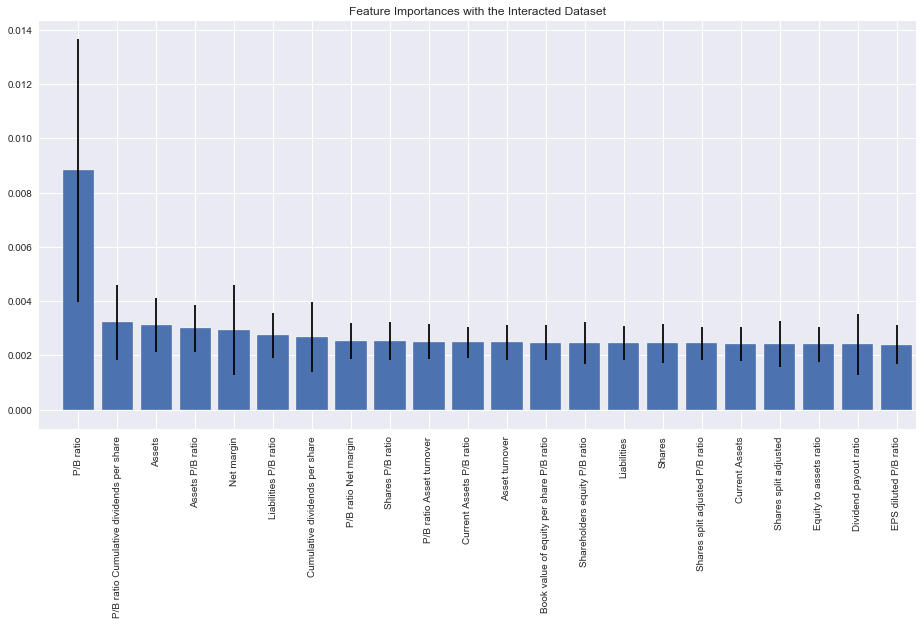

In [39]:
print("Feature Rankings:")

for i in range(20):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")
    
plt.figure(figsize=(14,7))

plt.title("Feature Importances with the Interacted Dataset")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, 21.5])
plt.show()

According to this, the top 20 important features do not contain many significant interactions.  Feature interaction may not be necessary for future modeling.

### Feature Importances from the original non-Interacted DF

In [43]:
forest = ExtraTreesClassifier(n_estimators=100)

# Dropping the necessary columns as well as any columns
X = final_df.drop(['Price', 'Price low', 'Price high', 'Future % High', 'Future % Low', 'Decision'], 1)
y = final_df.Decision

# Fitting the classifier
%timeit forest.fit(X, y)

14.7 s ± 289 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
# Determining the important features
importances = forest.feature_importances_

# The standard deviation among the trees for the important features
std = np.std([i.feature_importances_ for i in forest.estimators_], axis=0)

# Indexing and sorting the important features
indices = np.argsort(importances)[::-1]

### Plotting the most important features
from the non-interacted DF

Feature Rankings:
1. P/B ratio: 0.05009617620434173
2. Assets: 0.03221091910597906
3. P/E ratio: 0.03077508302926425
4. Shares split adjusted: 0.03073953459599086
5. Shares: 0.030189419199501542
6. Asset turnover: 0.03002246468550253
7. Net margin: 0.029375640358203187
8. Liabilities: 0.029315566599646566
9. Revenue: 0.02917381119517605
10. Current Assets: 0.029150423646425033
11. Cumulative dividends per share: 0.029109111509945117
12. Cash at end of period: 0.02907250980208782
13. Shareholders equity: 0.028485591379373364
14. Capital expenditures: 0.028391062326187187
15. Equity to assets ratio: 0.028298455535835067
16. Current ratio: 0.028136587603597826
17. Book value of equity per share: 0.02797395432744577
18. Current Liabilities: 0.027941131457260546
19. Free cash flow per share: 0.027689544765347848
20. Dividend payout ratio: 0.027683121372439064


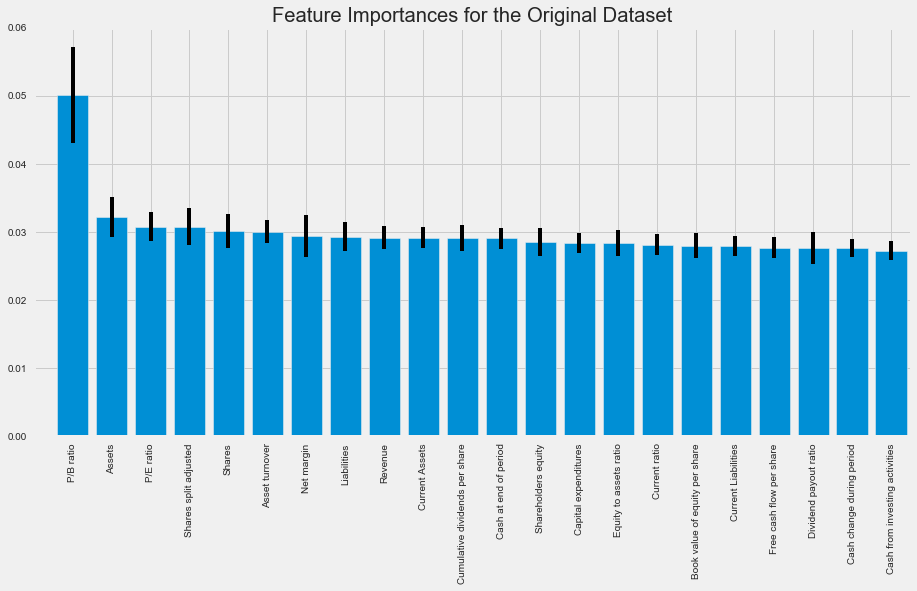

In [45]:
plt.style.use('fivethirtyeight')

print("Feature Rankings:")

for i in range(20):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")
    
plt.figure(figsize=(14,7))

plt.title("Feature Importances for the Original Dataset")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, 21.5])
plt.show()

## Selecting the Top 10 most important features
According to the feature importances from the original dataset.

In [46]:
# Assigning the top 10 features as a new DF
top10_df = final_df[X.columns[indices][:10]].join(final_df.Decision)
top10_df.head(5)

,P/B ratio,Assets,P/E ratio,Shares split adjusted,Shares,Asset turnover,Net margin,Liabilities,Revenue,Current Assets,Decision
7,6.572770,6.348610,104.033613,0.035544,0.035544,-14.583333,-100.000000,34.937688,4.316020,13.919567,1
10,-35.981308,-2.773498,0.000000,0.068244,0.068244,5.882353,0.000000,4.074505,24.802301,-1.988351,1
13,40.789474,-21.360116,0.000000,0.891886,0.891886,10.666667,0.000000,-4.274005,2.385821,-12.972848,1
42,-9.241706,6.549451,-54.961964,0.356223,0.356223,1.587302,51.690821,2.702703,13.872832,7.567568,1
47,7.770270,0.463730,10.287081,-0.143608,-0.143608,-1.298701,1.830065,-2.974056,-5.381944,2.621656,1


#### Optionally, selecting the top 5 and top 20 most important features

In [47]:
top5_df = final_df[X.columns[indices][:5]].join(final_df.Decision)
top5_df.head(5)

,P/B ratio,Assets,P/E ratio,Shares split adjusted,Shares,Decision
7,6.572770,6.348610,104.033613,0.035544,0.035544,1
10,-35.981308,-2.773498,0.000000,0.068244,0.068244,1
13,40.789474,-21.360116,0.000000,0.891886,0.891886,1
42,-9.241706,6.549451,-54.961964,0.356223,0.356223,1
47,7.770270,0.463730,10.287081,-0.143608,-0.143608,1


In [48]:
top20_df = final_df[X.columns[indices][:20]].join(final_df.Decision)
top20_df.head(5)

,P/B ratio,Assets,P/E ratio,Shares split adjusted,Shares,Asset turnover,Net margin,Liabilities,Revenue,Current Assets,Cumulative dividends per share,Cash at end of period,Shareholders equity,Capital expenditures,Equity to assets ratio,Current ratio,Book value of equity per share,Current Liabilities,Free cash flow per share,Dividend payout ratio,Decision
7,6.572770,6.348610,104.033613,0.035544,0.035544,-14.583333,-100.000000,34.937688,4.316020,13.919567,0.000000,87.008547,-5.407316,-58.682635,-11.049958,37.391014,-5.409836,-17.082917,-61.016949,0.0,1
10,-35.981308,-2.773498,0.000000,0.068244,0.068244,5.882353,0.000000,4.074505,24.802301,-1.988351,0.000000,-12.399050,-7.478504,51.724138,-4.825375,-12.009910,-7.555970,11.389173,-3.921569,0.0,1
13,40.789474,-21.360116,0.000000,0.891886,0.891886,10.666667,0.000000,-4.274005,2.385821,-12.972848,0.000000,-6.718852,-35.253511,103.225806,-17.660925,-2.364881,-35.802469,-10.867398,-31.914894,0.0,1
42,-9.241706,6.549451,-54.961964,0.356223,0.356223,1.587302,51.690821,2.702703,13.872832,7.567568,0.000000,14.328874,15.203426,25.925926,8.119519,1.775088,14.833127,5.690778,444.444444,0.0,1
47,7.770270,0.463730,10.287081,-0.143608,-0.143608,-1.298701,1.830065,-2.974056,-5.381944,2.621656,4.854369,3.827616,4.363974,-6.122449,3.867984,10.565378,4.527082,-7.185629,-77.272727,1.0,1


## Exporting the Top 10 Dataframe

In [49]:
with open("top10_df.pkl", "wb") as fp:
    pickle.dump(top10_df, fp)

#### Also exporting the top 5 and top 20 DFs

In [50]:
with open("top5_df.pkl", "wb") as fp:
    pickle.dump(top5_df, fp)

In [51]:
with open("top20_df.pkl", "wb") as fp:
    pickle.dump(top20_df, fp)